# __Part A: Generative Adversarial Networks__

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Problem Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


### __What is GAN?__

Gan represnts Generative Adversarial Networks which is all about creating here. Generally it is harder compared to other deep learning fields.

The main focus of GAN is to generate data be it images or videos or music from scratch and generally what does GAN consist of?

GAN are algorithic architectures that uses 2 neural networks, putting one against the other. This is to generate new, synthetic instances of data that can be pass as real data.

Generally, widely use in image generation, voice generation etc. 

GAN also work with competition of two different parts

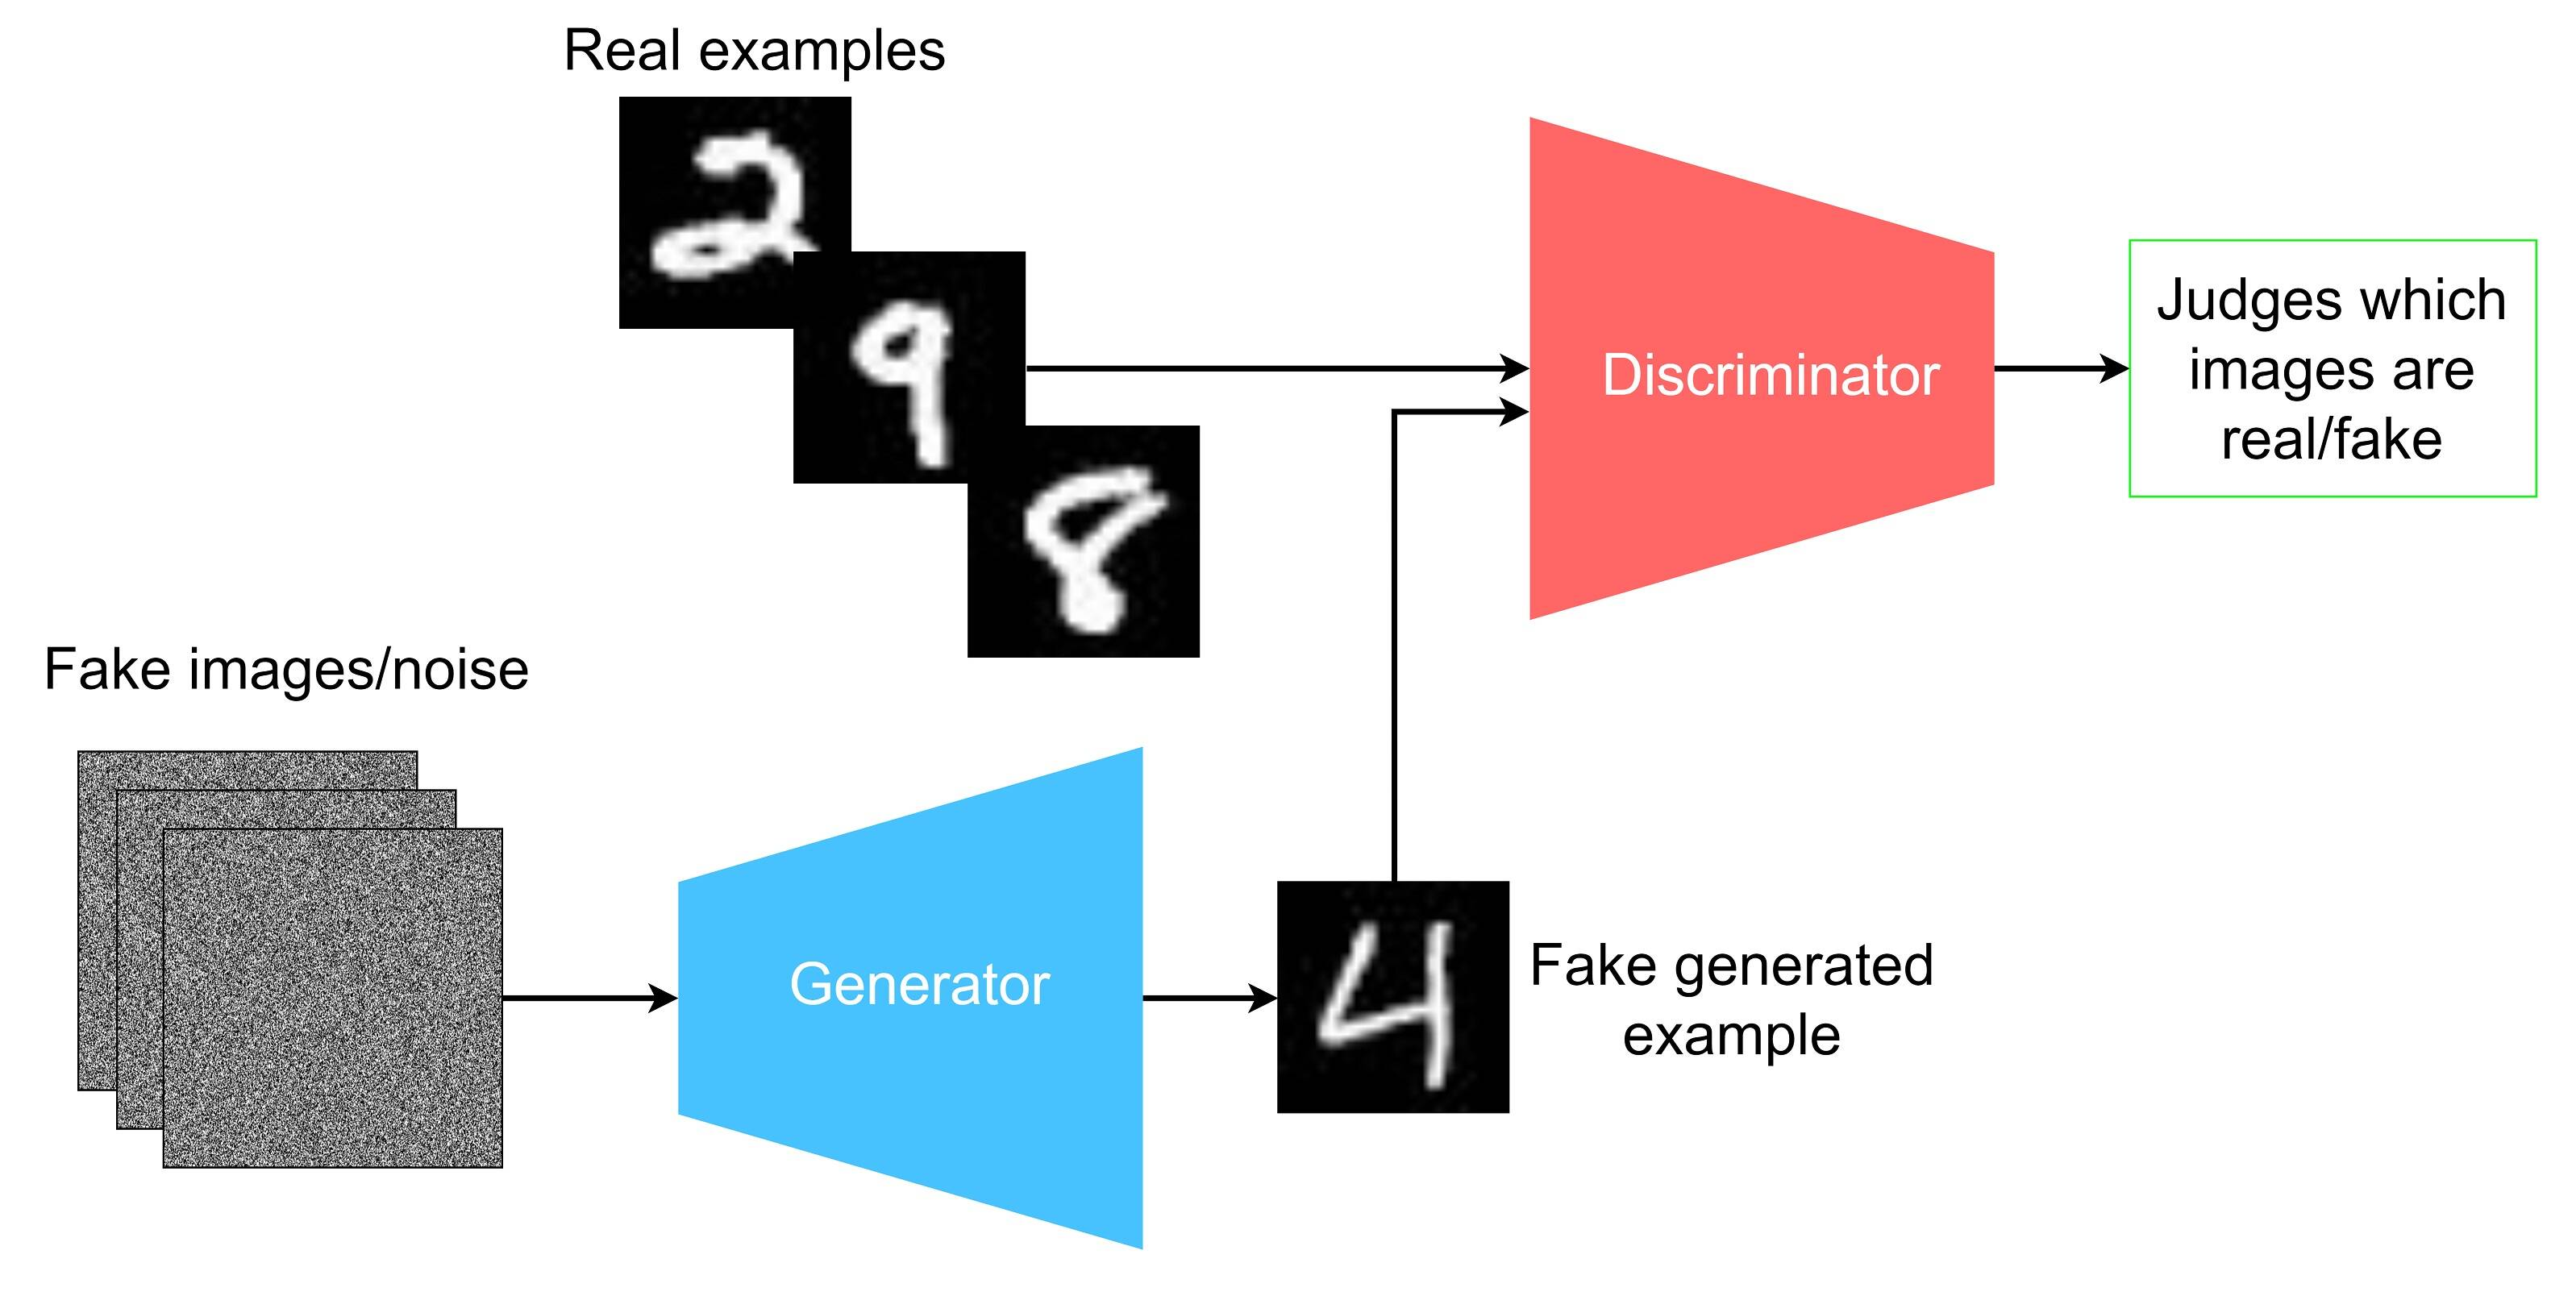

__Generator__
1. For this, you can input random images, known as random noise. This random images can be anything.
2. Through the generator, it will generate a sample that hopefully ends up like the real dataset if the generator and discrimintor and discriminator both are trained good enough
3. Output is sometimes refered to as latent space or a latent vector

What can we do to optimise?
1. Output must be pass through the generator through the discriminator, which then backpropagate and calculate the erros both the generator and discriminator 
2. Gan is also a form of decovolution and parameters, such as stride, padding, kernel size

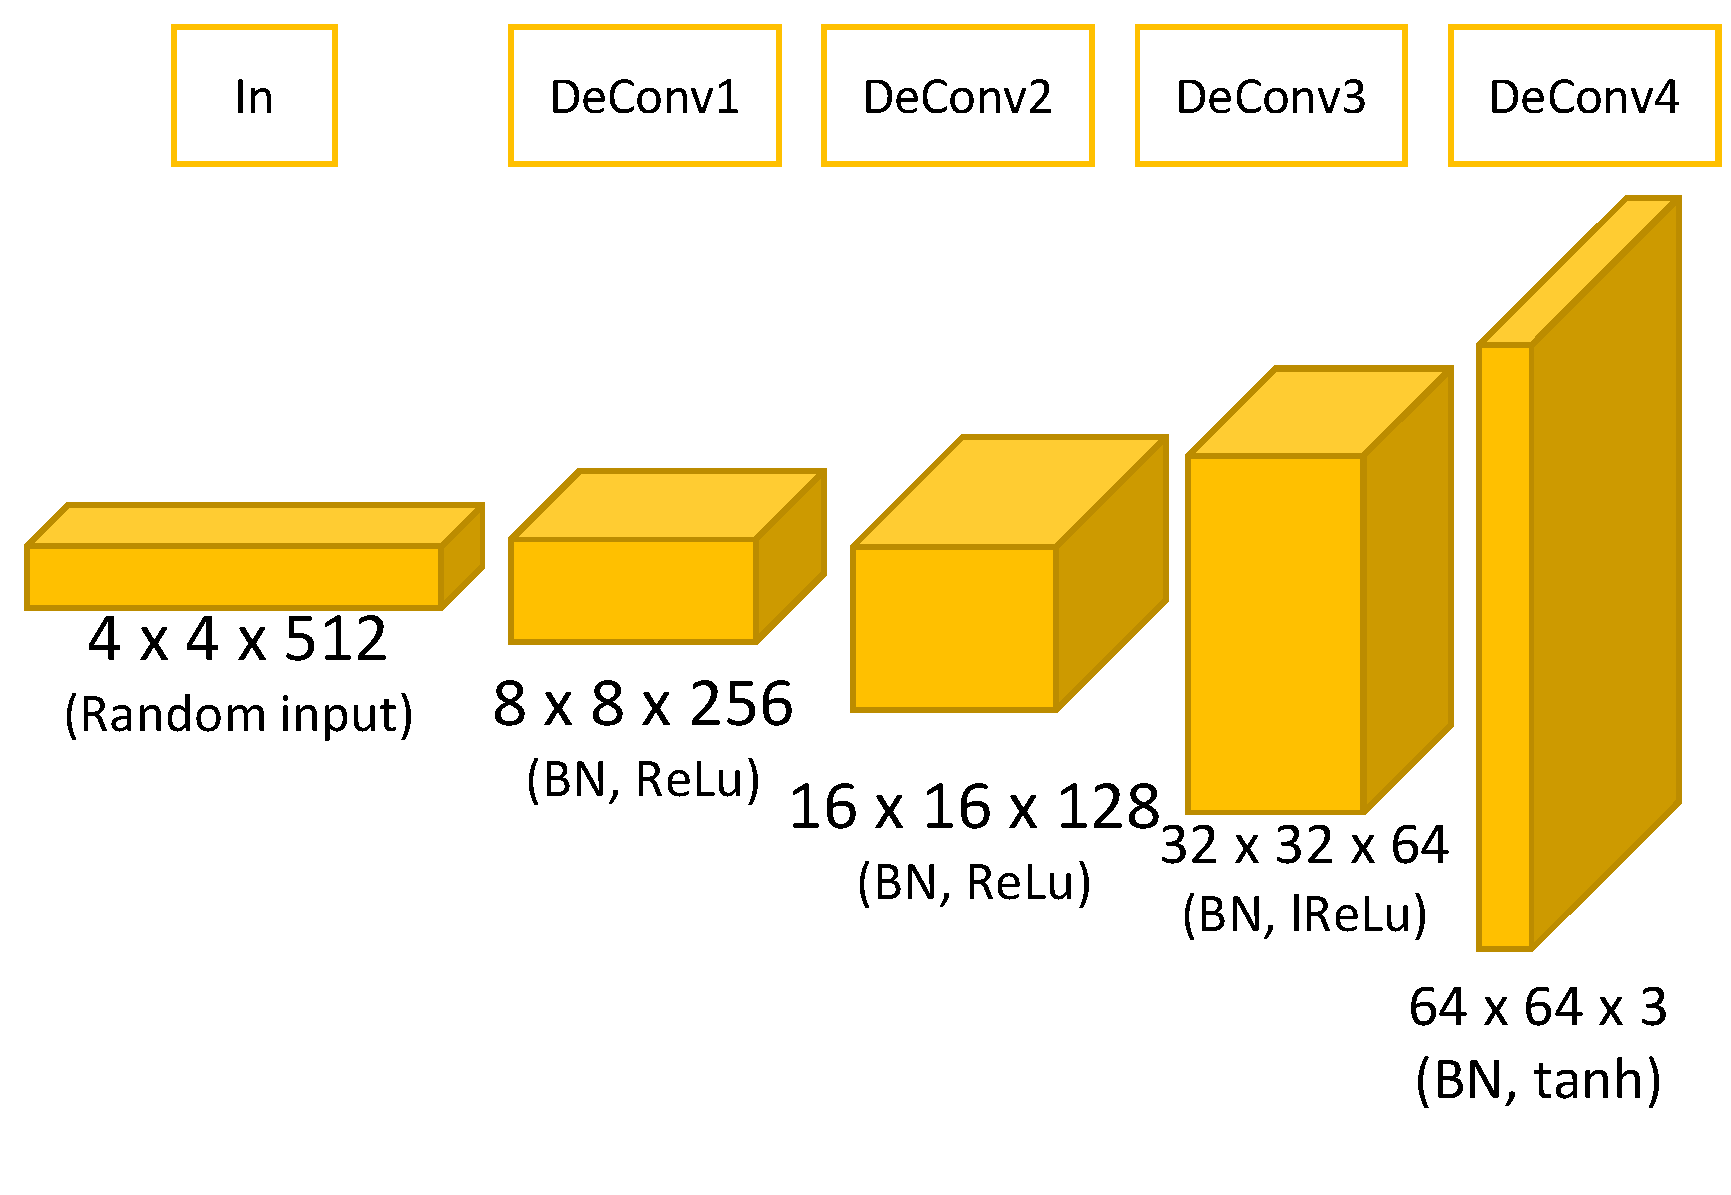

__Discriminator__ 
1. For this, input the real images from actual data tha needs to be generated like CIFAR1
2. Also, you input the output of generator into the discriminator
3. Convolutional layer of discrimnator is the normal convolution we are used to.
4. This are downscaled to the input that is suitable for classification. 

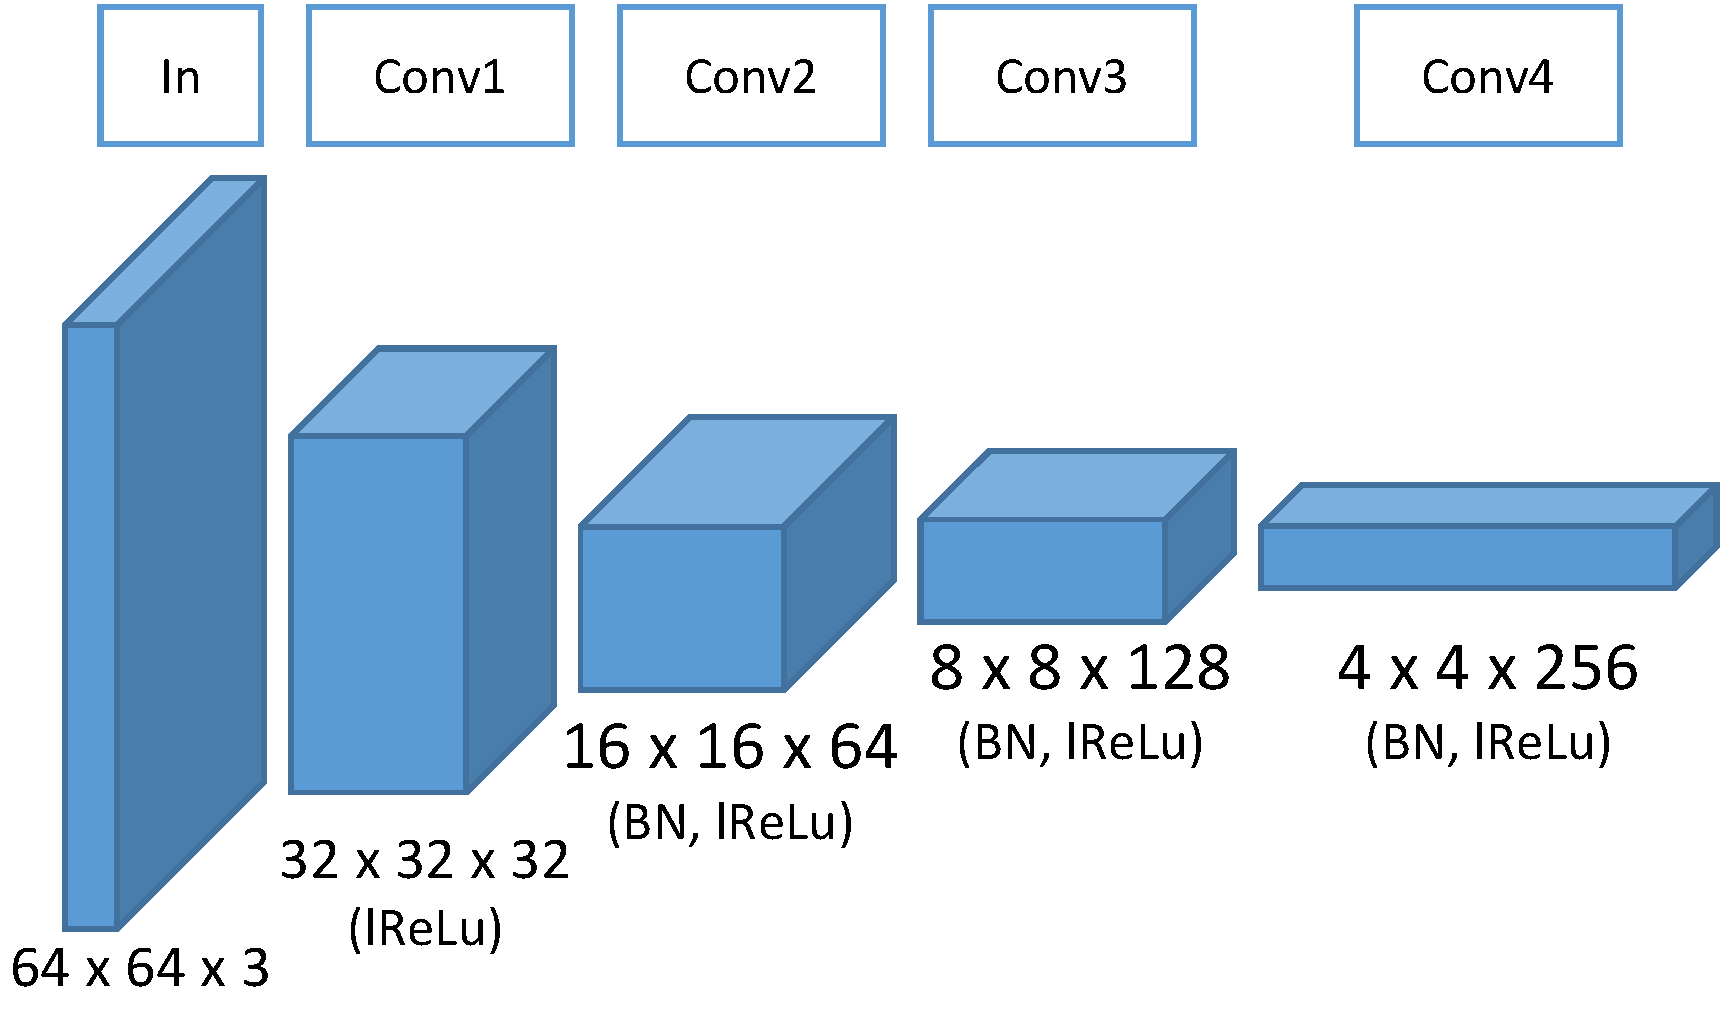


__How can we optimise both as a whole?__
After data is passed through both generator and discriminator, optimisation with backpropagation begins, the goal is to kepp improving at a level pace for both models to be good at its role, equilibrium point is exactly when the discriminator is leaning 50% to both sides, meaning that both images could either be real or fake, where the generator model tries to minimize the probability that the discriminator will predict the generator's output as fake. On the other side, the discriminator tries to maximize the probability that it will correctly classify both real and fake image

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


In [1]:
!pip install -q keras-tuner pandas matplotlib seaborn scikit-learn tqdm tensorflow_addons scikit-image

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Other Imports

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, accuracy_score

import os, time, math, datetime, warnings, pytz, glob
from IPython.display import display
from functools import reduce
import absl.logging
from tqdm import tqdm
import logging
from scipy.linalg import sqrtm
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

absl.logging.set_verbosity(absl.logging.ERROR)
logging.getLogger('tensorflow').disabled = True
warnings.filterwarnings('ignore')

### Tensorflow Import

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import expand_dims
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (Embedding, Dense, Input, InputLayer, Normalization, Flatten,BatchNormalization,
    Dropout,Conv2D, GlobalAveragePooling2D, MaxPooling2D, ReLU, Layer,Activation, Multiply, AveragePooling2D,
    Add, RandomRotation,Resizing, Rescaling, Reshape, Concatenate, concatenate, Lambda,LeakyReLU)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN, TensorBoard, CSVLogger, Callback
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adagrad, Adamax
from tensorflow.keras.regularizers import l2, L2
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.metrics import FalseNegatives, categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import *
from tensorflow_addons.optimizers import SWA
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import pairwise_kernels
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import PReLU,Dense, GlobalAveragePooling2D, Input, Conv2DTranspose
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.initializers import RandomNormal
from tensorflow_addons.layers import SpectralNormalization
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

from tensorflow.keras.datasets import cifar10
from kerastuner.tuners import Hyperband
from kerastuner import HyperModel
# Setting a seaborn style
sns.set(style="whitegrid")







### Set the seed of this notebook

In [4]:
seed = 32
tf.random.set_seed(seed)
np.random.seed(seed)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Check for GPU__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is check the available GPUs and set the memory growth

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPU


In [6]:
!nvidia-smi

Wed Jan 31 07:34:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:0A:00.0 Off |                  Off |
| 30%   45C    P2              34W / 450W |  10063MiB / 24564MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


In [7]:
data = tf.keras.datasets.cifar10.load_data()
(x_train, y_train) , (x_test, y_test) = data

In [8]:
y_train = to_categorical(y_train)

In [9]:
x_train.shape

(50000, 32, 32, 3)

### Set the labels for the Classes

This is so that we are able to use it for EDA and model training later on

In [10]:
cifarLab = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
class_labels = {idx: label for idx, label in enumerate(cifarLab)}
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


Below is the idea of feature engineering

1. **Convert Data Type**:
    ```python
    x_train = x_train.astype('float32')
    ```
    This line converts the data type of `x_train` elements to `float32`. It's a standard practice to use floating-point numbers in computations involving neural networks due to their capability to represent decimal values, which are crucial for the granularity of learning.

2. **Scale the Data**:
    ```python
    x_train /= (255/2)
    ```
    Here, the pixel values of the images (assuming `x_train` contains image data) are scaled. Usually, image data comes in the format of integers ranging from 0 to 255 (8-bit representation). This operation scales the data to a new range. Dividing by `(255/2)` scales the data to a range of [0, 2].

3. **Shift the Data**:
    ```python
    x_train -= 1
    ```
    This operation shifts the data range from [0, 2] to [-1, 1]. Shifting data to be centered around zero (mean = 0) can significantly improve the convergence during training, as it ensures that the input features have similar scales.




In [11]:

x_train = x_train.astype('float32')
x_train /= (255/2)
x_train -= 1


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Evaluation Metrics__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


### KID (Kernel Inception Distance)
1. Metrics used for evaluting the quality of images generated by GAN. This measures the similarity between two sets of images by comparing the statistics of deep features. These uses the pre trained Inception model

   $$
   MMD^2 = \frac{1}{m^2} \sum_{i=1}^{m} \sum_{j=1}^{m} K(x_i, x_j) + \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} K(y_i, y_j) - \frac{2}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} K(x_i, y_j)
   $$

- Compute the kernel metrics using kernel function
- Calculate the mean Maximum Mean Discrepancy
- Final average KID values computed over entire dataset
### FID
- Metrics that compares the statistics of generated images to real images in the feature space of a deep learning model (Inception model) and calculate the distance betwen the feature vectors of the real and generated images, lower FID implies that better quality of generated images

$$
FID = ||\mu_x - \mu_y||^2 + Tr(\Sigma_x + \Sigma_y - 2(\Sigma_x \Sigma_y)^{1/2})
$$
- Includes the Euclidean distance between mean vectors of real and generated images
- Tr denotes the trace of matrix
$$
(\Sigma_x \Sigma_y)^{1/2}
$$
 Denotes the sqaure root of the product of the covariance matrices which is computed using methods eigen decomposition




In [12]:

class Evaluation:
    def __init__(self, generator, latent_dim, sizeOfBatch, sample_size, sizeOfBuffer):
        self.generator = generator
        self.latent_dim = latent_dim
        self.sizeOfBatch = sizeOfBatch
        self.sample_size = sample_size
        self.sizeOfBuffer = sizeOfBuffer
        self.inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
        self.AUTO = tf.data.experimental.AUTOTUNE

    def generate_images(self, num_images,labels=None):
        print(labels)
        if labels is not None:
            random_latent_vectors = tf.random.normal(shape=(num_images, self.latent_dim))
            labels = tf.one_hot(labels, depth=10) 
            generated_images = self.generator.predict([random_latent_vectors, labels])
        else:
            random_latent_vectors = tf.random.normal(shape=(num_images, self.latent_dim))
            generated_images = self.generator.predict(random_latent_vectors)
        return generated_images

    def plot_loss_curve(self, history, title='Loss Curve'):
        plt.figure(figsize=(10, 5))
        plt.plot(history['g_loss'], label='Generator Loss')
        plt.plot(history['d_loss'], label='Discriminator Loss')
        plt.title(title)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def compute_metrics(self, train_data,cgan=False):
        # Preparing real and generated images
        real_images = tf.data.Dataset.from_tensor_slices(train_data).shuffle(self.sizeOfBuffer).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        
        if cgan:
            class_labels = np.arange(10)
            class_labels = np.repeat(class_labels, self.sample_size / 10).flatten()
            generated_images = self.generate_images(self.sample_size, class_labels)
            generated_images = tf.data.Dataset.from_tensor_slices(generated_images).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        else:
            generated_images = self.generate_images(self.sample_size)
            generated_images = tf.data.Dataset.from_tensor_slices(generated_images).batch(self.sizeOfBatch).map(self.__scale_and_preprocess).prefetch(self.AUTO)
        # Compute embeddings
        real_embeddings = self.__compute_embeddings(real_images, math.ceil(len(train_data) / self.sizeOfBatch))
        generated_embeddings = self.__compute_embeddings(generated_images, math.ceil(self.sample_size / self.sizeOfBatch))

        # Calculate FID
        fid = self.__calculate_fid(real_embeddings, generated_embeddings)
        kid = self.__calculate_kid(real_embeddings, generated_embeddings)
        return fid, kid

        
    def __calculate_kid(self,real_embeddings, generated_embeddings):
        # Polynomial kernel computation
        kernel_real = pairwise_kernels(real_embeddings, metric='polynomial', degree=3)
        kernel_gen = pairwise_kernels(generated_embeddings, metric='polynomial', degree=3)
        kernel_real_gen = pairwise_kernels(real_embeddings, generated_embeddings, metric='polynomial', degree=3)

        m = real_embeddings.shape[0]
        n = generated_embeddings.shape[0]

        # KID calculation
        kid = (np.sum(kernel_real) / (m * (m - 1)) +
               np.sum(kernel_gen) / (n * (n - 1)) -
               2 * np.sum(kernel_real_gen) / (m * n))
        return kid
    def __scale_and_preprocess(self, image):
        image = (image + 1) / 2 * 255.0
        image = preprocess_input(image)
        return tf.image.resize(image, (299, 299))

    def __compute_embeddings(self, dataloader, count):
        embeddings = []
        for batch in dataloader.take(count):
            batch_embeddings = self.inception_model.predict(batch, verbose=0)
            embeddings.extend(batch_embeddings)
        return np.array(embeddings)

    def __calculate_fid(self, real_embeddings, generated_embeddings):
        mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
        mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings, rowvar=False)
        ssdiff = np.sum((mu1 - mu2)**2.0)
        covmean = sqrtm(sigma1.dot(sigma2))
        if np.iscomplexobj(covmean):
            covmean = covmean.real
        return ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)


### Visual Approach
1. Even with metrics above, human approach is required to be able to see and tell what the images is 
2. Below function is to generate 1000 images to be able to view the diversity and how well the image is representing the data

In [13]:
def generate_1000(generator, num_iterations=10, saveDisk=False):
    for iteration in range(num_iterations):
        latent_z = np.random.normal(size=(100, 128))
        imgs = generator.predict(latent_z)
        fig, axes = plt.subplots(10, 10, figsize=(20, 20))
        fig.patch.set_facecolor('#abdbe3')
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)
        for idx, ax in enumerate(axes.flatten()):
            ax.imshow((imgs[idx] + 1) / 2, interpolation='nearest')
            ax.axis('off')  
        if saveDisk:
            plt.savefig(f'generated_images_set_{iteration + 1}.png', bbox_inches='tight', pad_inches=0)
        else:
            plt.show()

        plt.close(fig)

In [14]:
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss

def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)

In [15]:
def train_gan(d, g, latent_dim, model_name, data, e, learning_rate=2e-4, beta_1=0.5, use_multiprocessing=True, workers=16, callbacks=None):
    gan = WGAN(discriminator=d,generator=g,latent_dim=128,    discriminator_extra_steps=3, )
    gan.compile(
        d_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
        g_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
        g_loss_fn=generator_loss,
        d_loss_fn=discriminator_loss,
    )
    gan_hist = gan.fit(
        dataset,
        epochs=e,
        use_multiprocessing=True,
        workers=16,
        callbacks=callbacks
    )
    return gan_hist, gan


<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Baseline Model (WGAN)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


## __Key Ideas__
1. Wasserstein Distance:
    - The Wasserstein distance provides a more stable and meaningful measurement of the distance between two distributions and less likely to provide vanishing gradients, which are a significant issue in traditional GANs
2. Critic instead of Discriminator:

    - In WGAN, the discriminator (now called a critic) doesn't classify inputs as real or fake. Instead, it scores the inputs based on their "realness" without being confined to [0,1] through sigmoid activation. This change helps in providing more useful gradients to the generator throughout the training process.
    Weight Clipping:

3. No Logarithm in Loss Function:

    - The WGAN loss function doesn't use logarithms, addressing the vanishing gradient problem by providing smoother and more meaningful gradients.

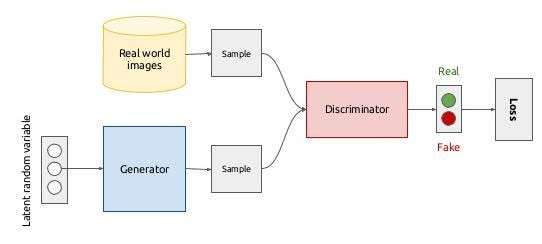

In [16]:
full_scores = pd.DataFrame()

In [17]:
sizeOfBatch = 64
AUTO = tf.data.AUTOTUNE
sizeOfBuffer = 1024
noise = 128
numberClass = 10
latent_dim = 128

### Creating the dataset

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.cache().shuffle(buffer_size=sizeOfBuffer).batch(batch_size=sizeOfBatch).prefetch(AUTO)
dataset

<PrefetchDataset element_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None)>

### Training Loop and Callbacks

#### Model Training

- Below defines the WGAN Model
- Different train step of discriminator and generator
- Real and fake d loss was track together with d accuracy and g loss here
- Addition of gradient penalty here

In [19]:
class WGAN(tf.keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=3,
        gp_weight=10.0,
    ):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

        # Initialize metrics
        self.d_real_loss_metric = tf.keras.metrics.Mean(name='d_real_loss')
        self.d_fake_loss_metric = tf.keras.metrics.Mean(name='d_fake_loss')
        self.g_loss_metric = tf.keras.metrics.Mean(name='g_loss')
        self.d_acc_metric = tf.keras.metrics.BinaryAccuracy(name='d_acc')
        self.class_acc_metric = tf.keras.metrics.BinaryAccuracy(name='class_acc')

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images):
        # Get the interpolated image
        alpha = tf.random.uniform([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]

        # Get the batch size
        batch_size = tf.shape(real_images)[0]
        for i in range(3):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images = self.generator(random_latent_vectors, training=True)
                # Get the logits for the fake images
                fake_logits = self.discriminator(fake_images, training=True)
                # Get the logits for the real images
                real_logits = self.discriminator(real_images, training=True)

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        # Train the generator
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_images = self.generator(random_latent_vectors, training=True)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator(generated_images, training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        self.d_real_loss_metric.update_state(real_logits)
        self.d_fake_loss_metric.update_state(fake_logits)
        self.g_loss_metric.update_state(g_loss)

        # Assuming you have a method to calculate the discriminator's accuracy
        self.d_acc_metric.update_state(tf.ones_like(real_logits), real_logits)
        self.d_acc_metric.update_state(tf.zeros_like(fake_logits), fake_logits)


        return {
            "d_real_loss": self.d_real_loss_metric.result(),
            "d_fake_loss": self.d_fake_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
            "d_acc": self.d_acc_metric.result(),
            "d_realO": tf.reduce_mean(real_logits),
            "d_fakeO": tf.reduce_mean(fake_logits)
        }


#### Callback

- Two callback of image generation and checkpoint to save models was created here

In [20]:
class ImageGenerationCallback(tf.keras.callbacks.Callback):
    def __init__(self, num_img=10, noise=128, display_freq=10, vmin=0, vmax=1):
        self.num_img = num_img
        self.noise = noise
        self.display_freq = display_freq
        self.vmin = vmin
        self.vmax = vmax
        self.constant_noise = tf.random.normal(shape=(self.num_img, self.noise))

    def generate_plot(self):
        generated_images = self.model.generator(self.constant_noise)
        generated_images = (generated_images - self.vmin) / (self.vmax - self.vmin)

        fig = plt.figure(figsize=(12, 6))
        gs = gridspec.GridSpec(2, 5)
        for i in range(self.num_img):
            ax = plt.subplot(gs[i])
            ax.imshow(generated_images[i, :, :, :])
            ax.axis('off')
        fig.patch.set_facecolor('#f0f0f0')  
        plt.suptitle("Generated Images", fontsize=16)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.show()

    # Generate plots every 10 epoch
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            self.generate_plot()

In [21]:
class ModelCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, save_freq=10, model_dir='GAN'):
        self.save_freq = save_freq
        self.model_dir = model_dir

    # Saving the weights
    def save(self, epoch=None):
        if epoch is not None:
            name = f'generator-{epoch}.h5'
            full_path = os.path.join(self.model_dir, name)
            os.makedirs(self.model_dir, exist_ok=True)
            self.model.generator.save(filepath=full_path, save_format='h5')
    
    # Saving after end 
    def on_train_end(self, logs=None):
        if not os.path.exists(self.model_dir):
            os.makedirs(self.model_dir)
        self.save('final')

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.save_freq == 0:
            self.save(epoch)



### First Model

##### Generator

__Key Ideas__

 1. **Input and Reshape Layers**:
- **Dense Layer**: 
    - **Units**: 256 * 4 * 4
    - **Input**: `latent_dim` (the dimension of the latent space).

- **LeakyReLU**:
    - **Alpha**: 0.2

- **Reshape**:
    - **New Shape**: (4, 4, 256)

 2. **Convolutional Layers and Upsampling**:
- **UpSampling2D** (3 times):

- **Conv2D and LeakyReLU Pairs** (3 times):
    - **Filters**: 128 (for each Conv2D layer)
    - **Kernel Size**: (3, 3) (for each Conv2D layer)
    - **Padding**: 'same' (keeps the spatial dimensions constant after the operation)
    - **Activation (LeakyReLU)**: Alpha set to 0.2

 3. **Output Layer**:
- **Conv2D**:
    - **Filters**: 3 (representing RGB channels)
    - **Kernel Size**: (3, 3)
    - **Activation**: 'tanh'
    - **Padding**: 'same'

In [22]:
def build_generator(latent_dim):
    model = Sequential()
    # Foundation for 8x8 feature maps
    n_nodes = 256 * 4 * 4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))
    # Upsample to 16x16
    model.add(UpSampling2D())
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # Upsample to 32x32
    model.add(UpSampling2D())
    model.add(Conv2D(3, (3,3), padding='same', activation='tanh'))
    return model


##### Discriminator
__Key Ideas__ (DCGAN3)

1. **Input Layer and Convolutional Layers**:
    - **Conv2D (First Layer)**:
        - **Filters**: 64
        - **Kernel Size**: (3,3), captures spatial features.
        - **Strides**: (2,2),
        - **Padding**: 'same'
        - **Input Shape**: `in_shape` (the shape of the input images).
    - **LeakyReLU**:
        - **Alpha**: 0.2

    - **Conv2D (Second Layer)**:
        - **Filters**: 128
        - **Kernel Size**: (3,3)
        - **Strides**: (2,2),  reduces the spatial dimensions to half
        - **Padding**: 'same'
    - **LeakyReLU**:
        - **Alpha**: 0.2

2. **Flattening and Output Layer**:
    - **Flatten**: Transforms the 2D feature maps into a 1D feature vector, preparing it for the dense output layer.
    - **Dense**:
        - **Units**: 1, the output layer for binary classification.
        - **Activation**: 'sigmoid'



In [23]:
def build_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    # Downsample to 16x16
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # Downsample to 8x8
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # Flatten and output layer
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

#### Creating Checkpoint

In [24]:
callbacks = [ImageGenerationCallback(num_img=10, noise=128,  vmin=-1, vmax=1), ModelCheckpointCallback(model_dir='baselineWGAN-1')]

#### Training

In [25]:
discriminator_wgan1 = build_discriminator()
generator_wgan1 = build_generator(128)

In [26]:
tf.keras.backend.clear_session()
K.clear_session()

Epoch 1/25
782/782 [==============================] - ETA: 0s - d_real_loss: 0.3231 - d_fake_loss: 0.4251 - g_loss: -0.4260 - d_acc: 0.4629 - d_realO: 0.3231 - d_fakeO: 0.4251

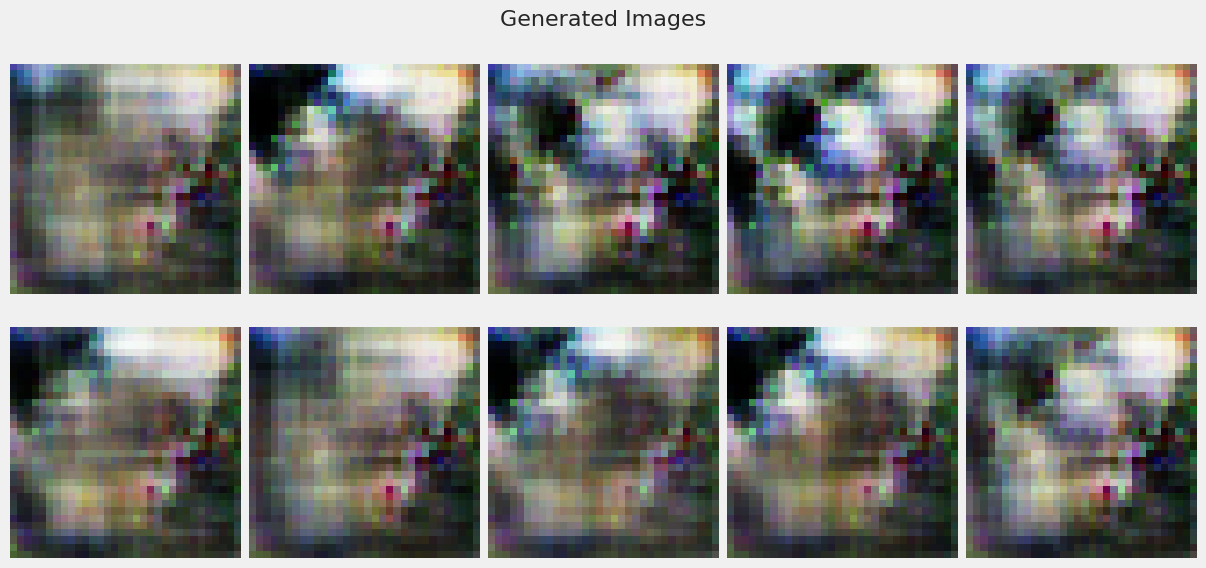

782/782 [==============================] - 11s 11ms/step - d_real_loss: 0.3231 - d_fake_loss: 0.4251 - g_loss: -0.4260 - d_acc: 0.4629 - d_realO: 0.3231 - d_fakeO: 0.4251
Epoch 2/25
782/782 [==============================] - 8s 11ms/step - d_real_loss: 0.3611 - d_fake_loss: 0.4288 - g_loss: -0.4192 - d_acc: 0.4447 - d_realO: 0.3613 - d_fakeO: 0.4285
Epoch 3/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.3530 - d_fake_loss: 0.5169 - g_loss: -0.5188 - d_acc: 0.2936 - d_realO: 0.3530 - d_fakeO: 0.5166
Epoch 4/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.4565 - d_fake_loss: 0.4828 - g_loss: -0.4769 - d_acc: 0.4845 - d_realO: 0.4568 - d_fakeO: 0.4826
Epoch 5/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.4950 - d_fake_loss: 0.4697 - g_loss: -0.4661 - d_acc: 0.5617 - d_realO: 0.4951 - d_fakeO: 0.4696
Epoch 6/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.4979 - d_fake_loss: 0

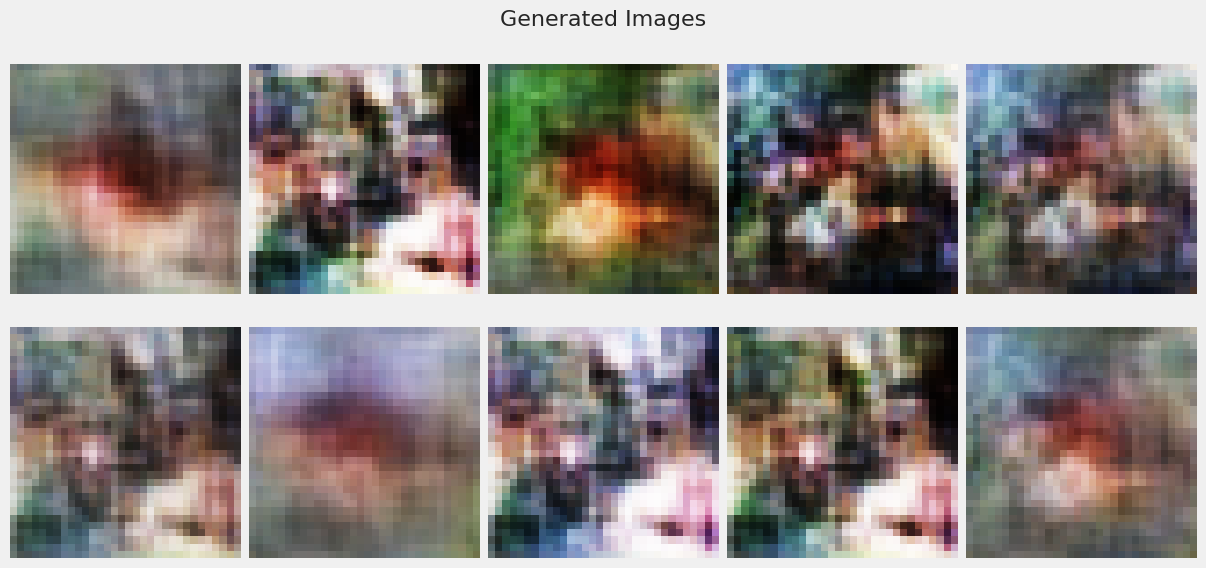

782/782 [==============================] - 9s 12ms/step - d_real_loss: 0.5264 - d_fake_loss: 0.4795 - g_loss: -0.4709 - d_acc: 0.5879 - d_realO: 0.5264 - d_fakeO: 0.4796
Epoch 12/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5248 - d_fake_loss: 0.4874 - g_loss: -0.4812 - d_acc: 0.5635 - d_realO: 0.5249 - d_fakeO: 0.4875
Epoch 13/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5350 - d_fake_loss: 0.5041 - g_loss: -0.4947 - d_acc: 0.5514 - d_realO: 0.5348 - d_fakeO: 0.5038
Epoch 14/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5433 - d_fake_loss: 0.5013 - g_loss: -0.4907 - d_acc: 0.5724 - d_realO: 0.5435 - d_fakeO: 0.5015
Epoch 15/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5433 - d_fake_loss: 0.4978 - g_loss: -0.4923 - d_acc: 0.5770 - d_realO: 0.5434 - d_fakeO: 0.4978
Epoch 16/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5517 - d_fake_los

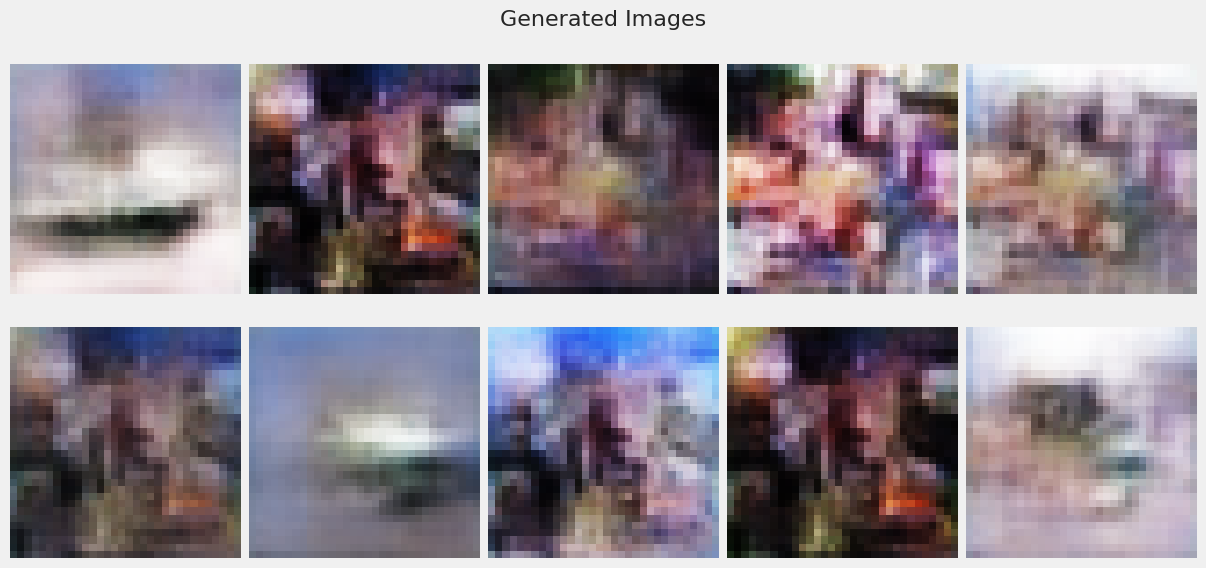

782/782 [==============================] - 9s 12ms/step - d_real_loss: 0.5523 - d_fake_loss: 0.4833 - g_loss: -0.4777 - d_acc: 0.6249 - d_realO: 0.5524 - d_fakeO: 0.4832
Epoch 22/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5550 - d_fake_loss: 0.4868 - g_loss: -0.4783 - d_acc: 0.6213 - d_realO: 0.5550 - d_fakeO: 0.4868
Epoch 23/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5559 - d_fake_loss: 0.4950 - g_loss: -0.4875 - d_acc: 0.6047 - d_realO: 0.5558 - d_fakeO: 0.4949
Epoch 24/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5568 - d_fake_loss: 0.4864 - g_loss: -0.4805 - d_acc: 0.6256 - d_realO: 0.5567 - d_fakeO: 0.4862
Epoch 25/25
782/782 [==============================] - 9s 11ms/step - d_real_loss: 0.5562 - d_fake_loss: 0.4756 - g_loss: -0.4698 - d_acc: 0.6436 - d_realO: 0.5562 - d_fakeO: 0.4756


In [27]:
gan_1= train_gan(discriminator_wgan1, generator_wgan1, noise, 'Baseline WGAN 1', dataset, 25, callbacks=callbacks)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Looking at the accuracy, we can see that the discriminator ended with a  64% which shows that both are pretty evenly match

</div>

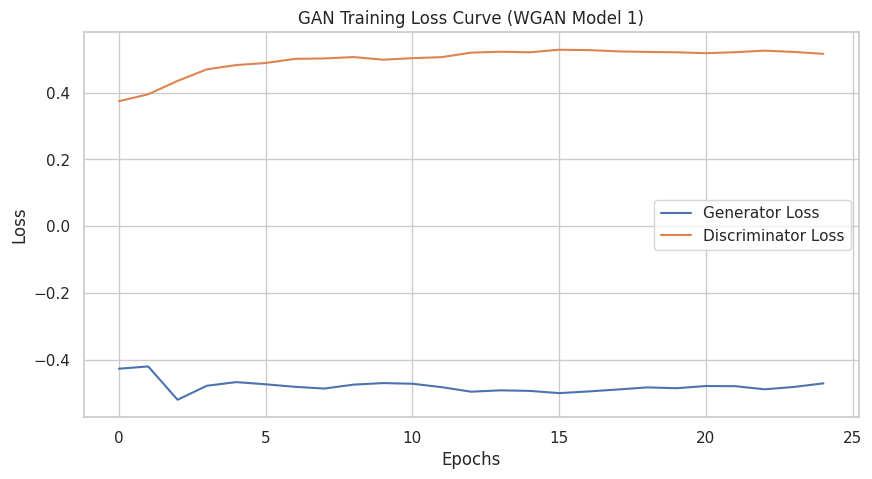

In [28]:
gan_history_1 = gan_1[0].history
generator = gan_1[1].generator  
gan_history_1['d_loss'] = [(real_loss + fake_loss) / 2 for real_loss, fake_loss in zip(gan_history_1['d_real_loss'], gan_history_1['d_fake_loss'])]
evaluator = Evaluation(generator, latent_dim, 512, 10000, 1024)
evaluator.plot_loss_curve(gan_history_1, title='GAN Training Loss Curve (WGAN Model 1)')


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Discriminator loss
    - For the discriminator loss, it maintains pretty constant here
- Generator loss
    - For the generator loss, it maintains pretty stable here

</div>

In [29]:
tf.keras.backend.clear_session()
K.clear_session()
scores1 = evaluator.compute_metrics(x_train)
print('FID Score:', scores1[0])
print('KID Score:', scores1[1])

None
313/313 [==============================] - 0s 1ms/step
FID Score: 129.0749239362149
KID Score: 0.08539832181622398


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- FID Score of 129 
- KID Score is 0.08
    
Worse than DCGAN here

</div>

#### Visualise the Images

4/4 [==============================] - 0s 5ms/step


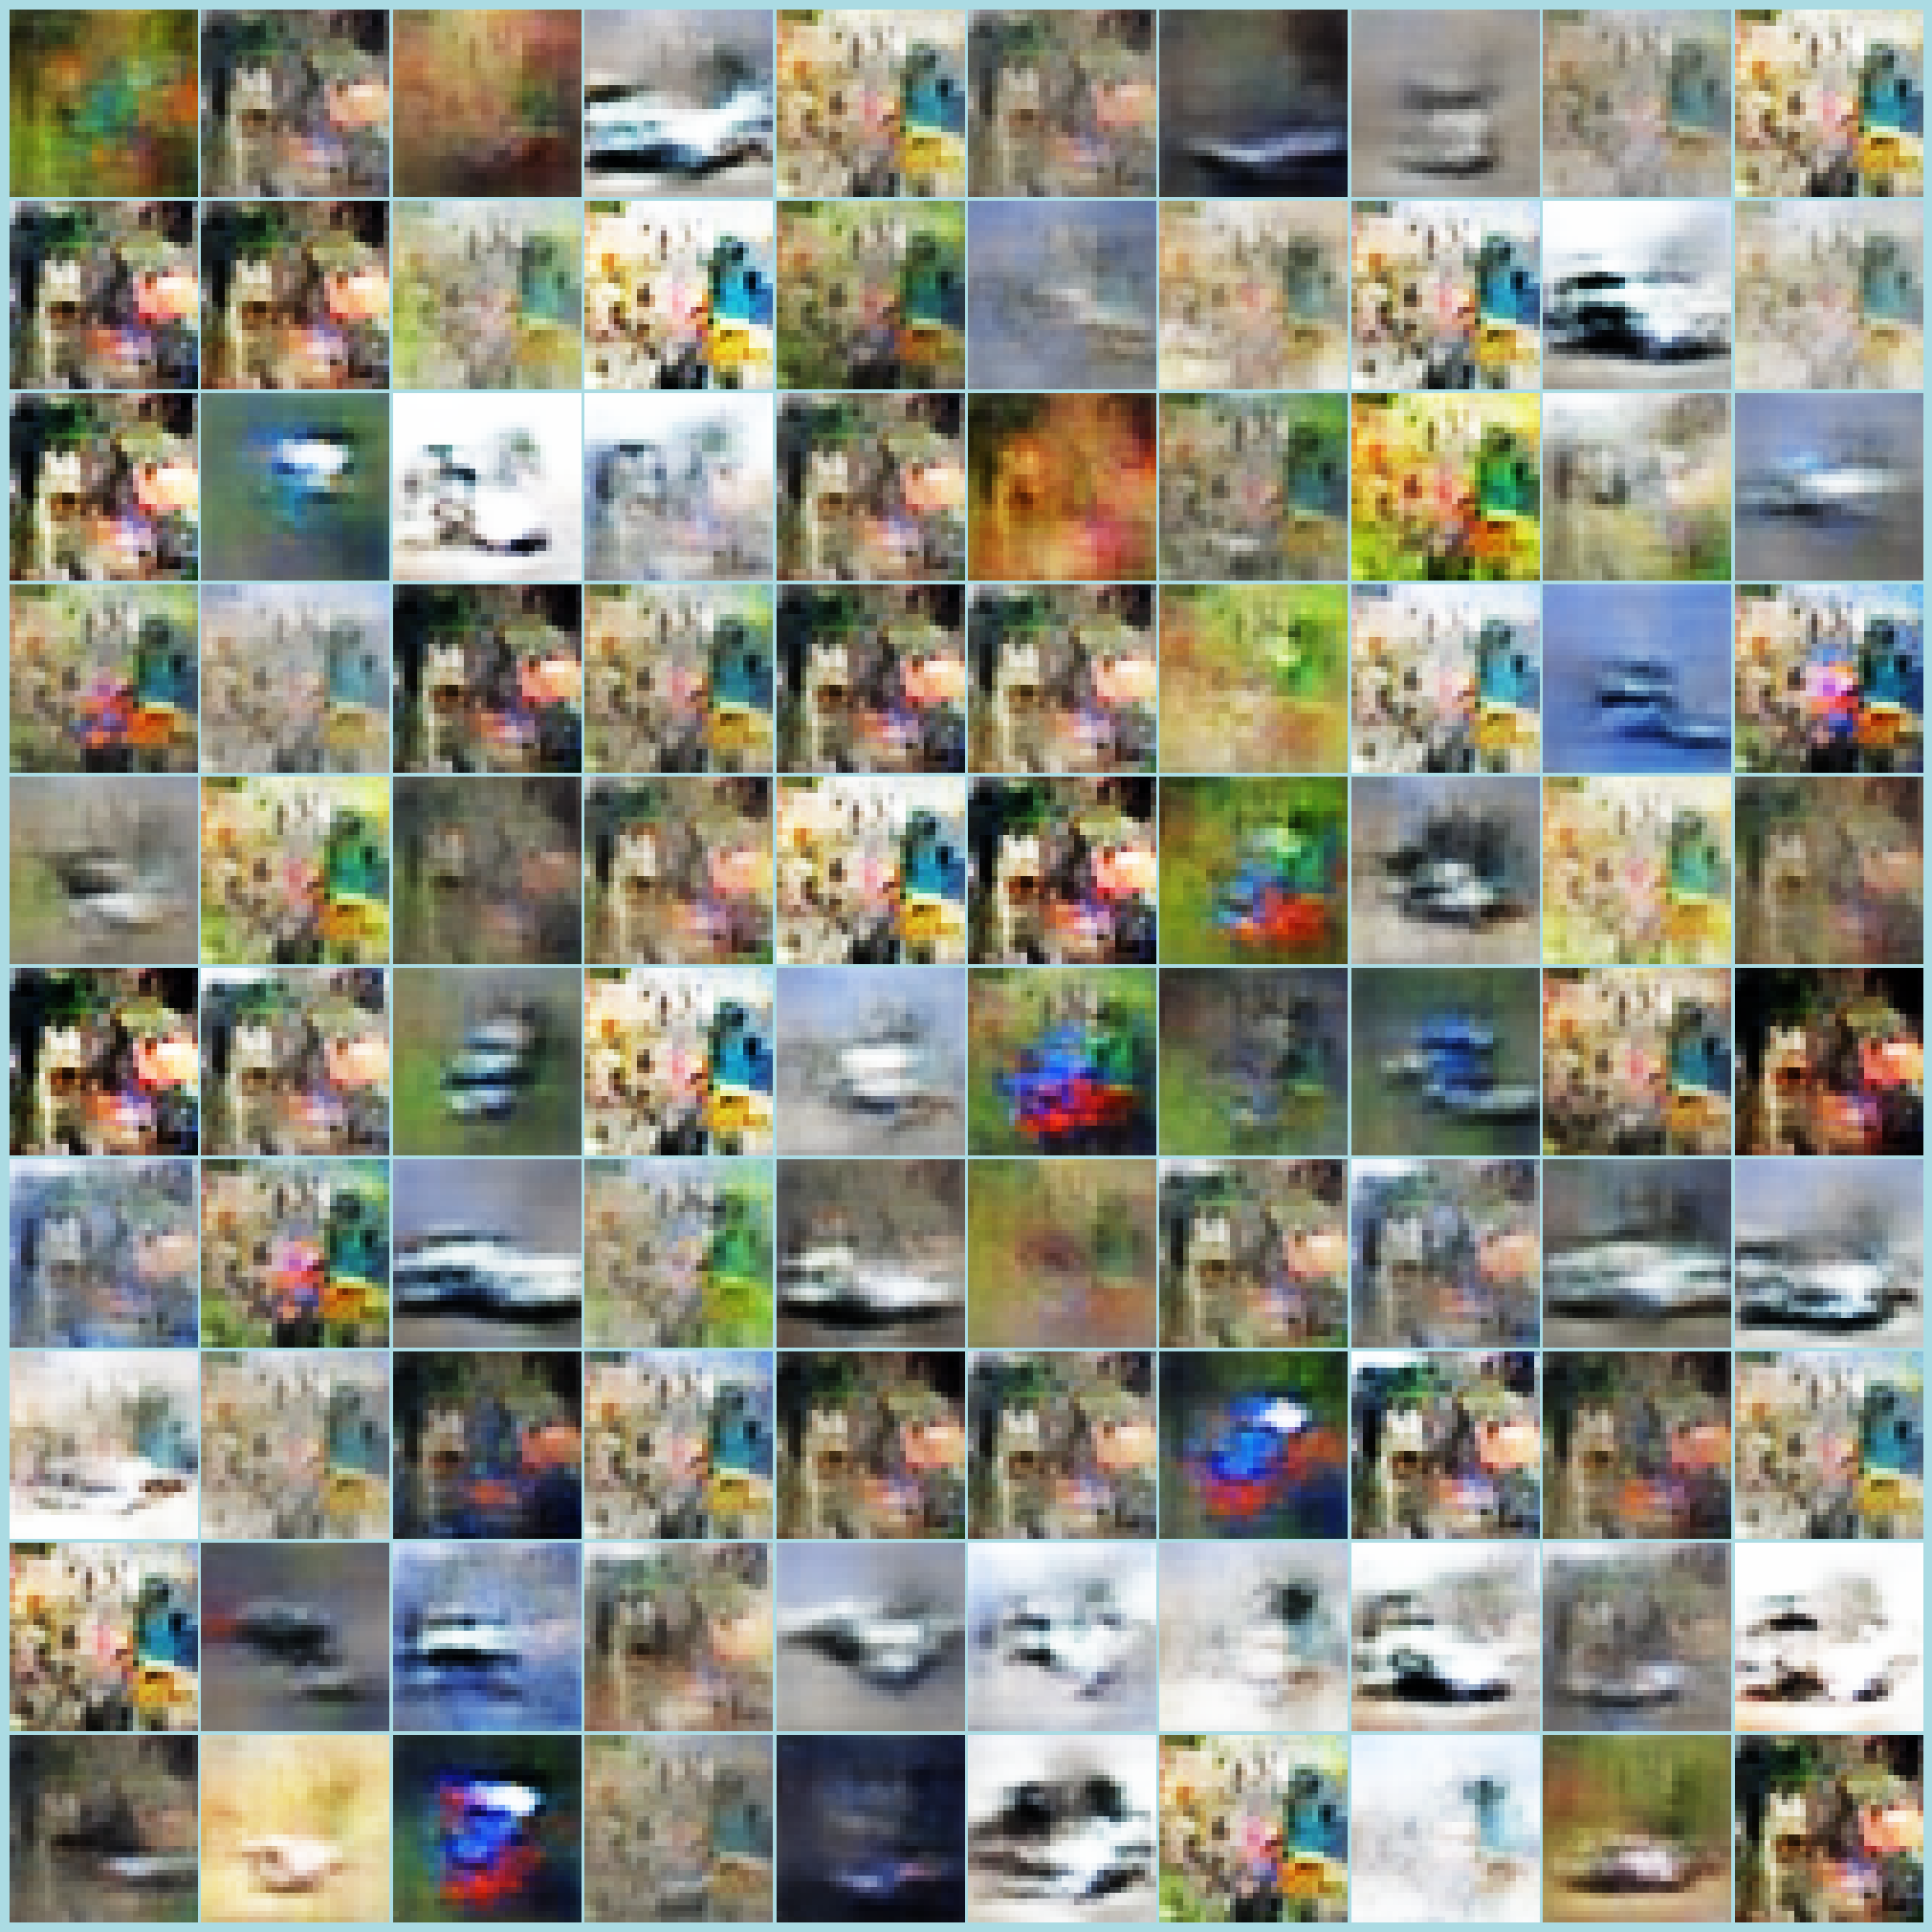

4/4 [==============================] - 0s 1ms/step


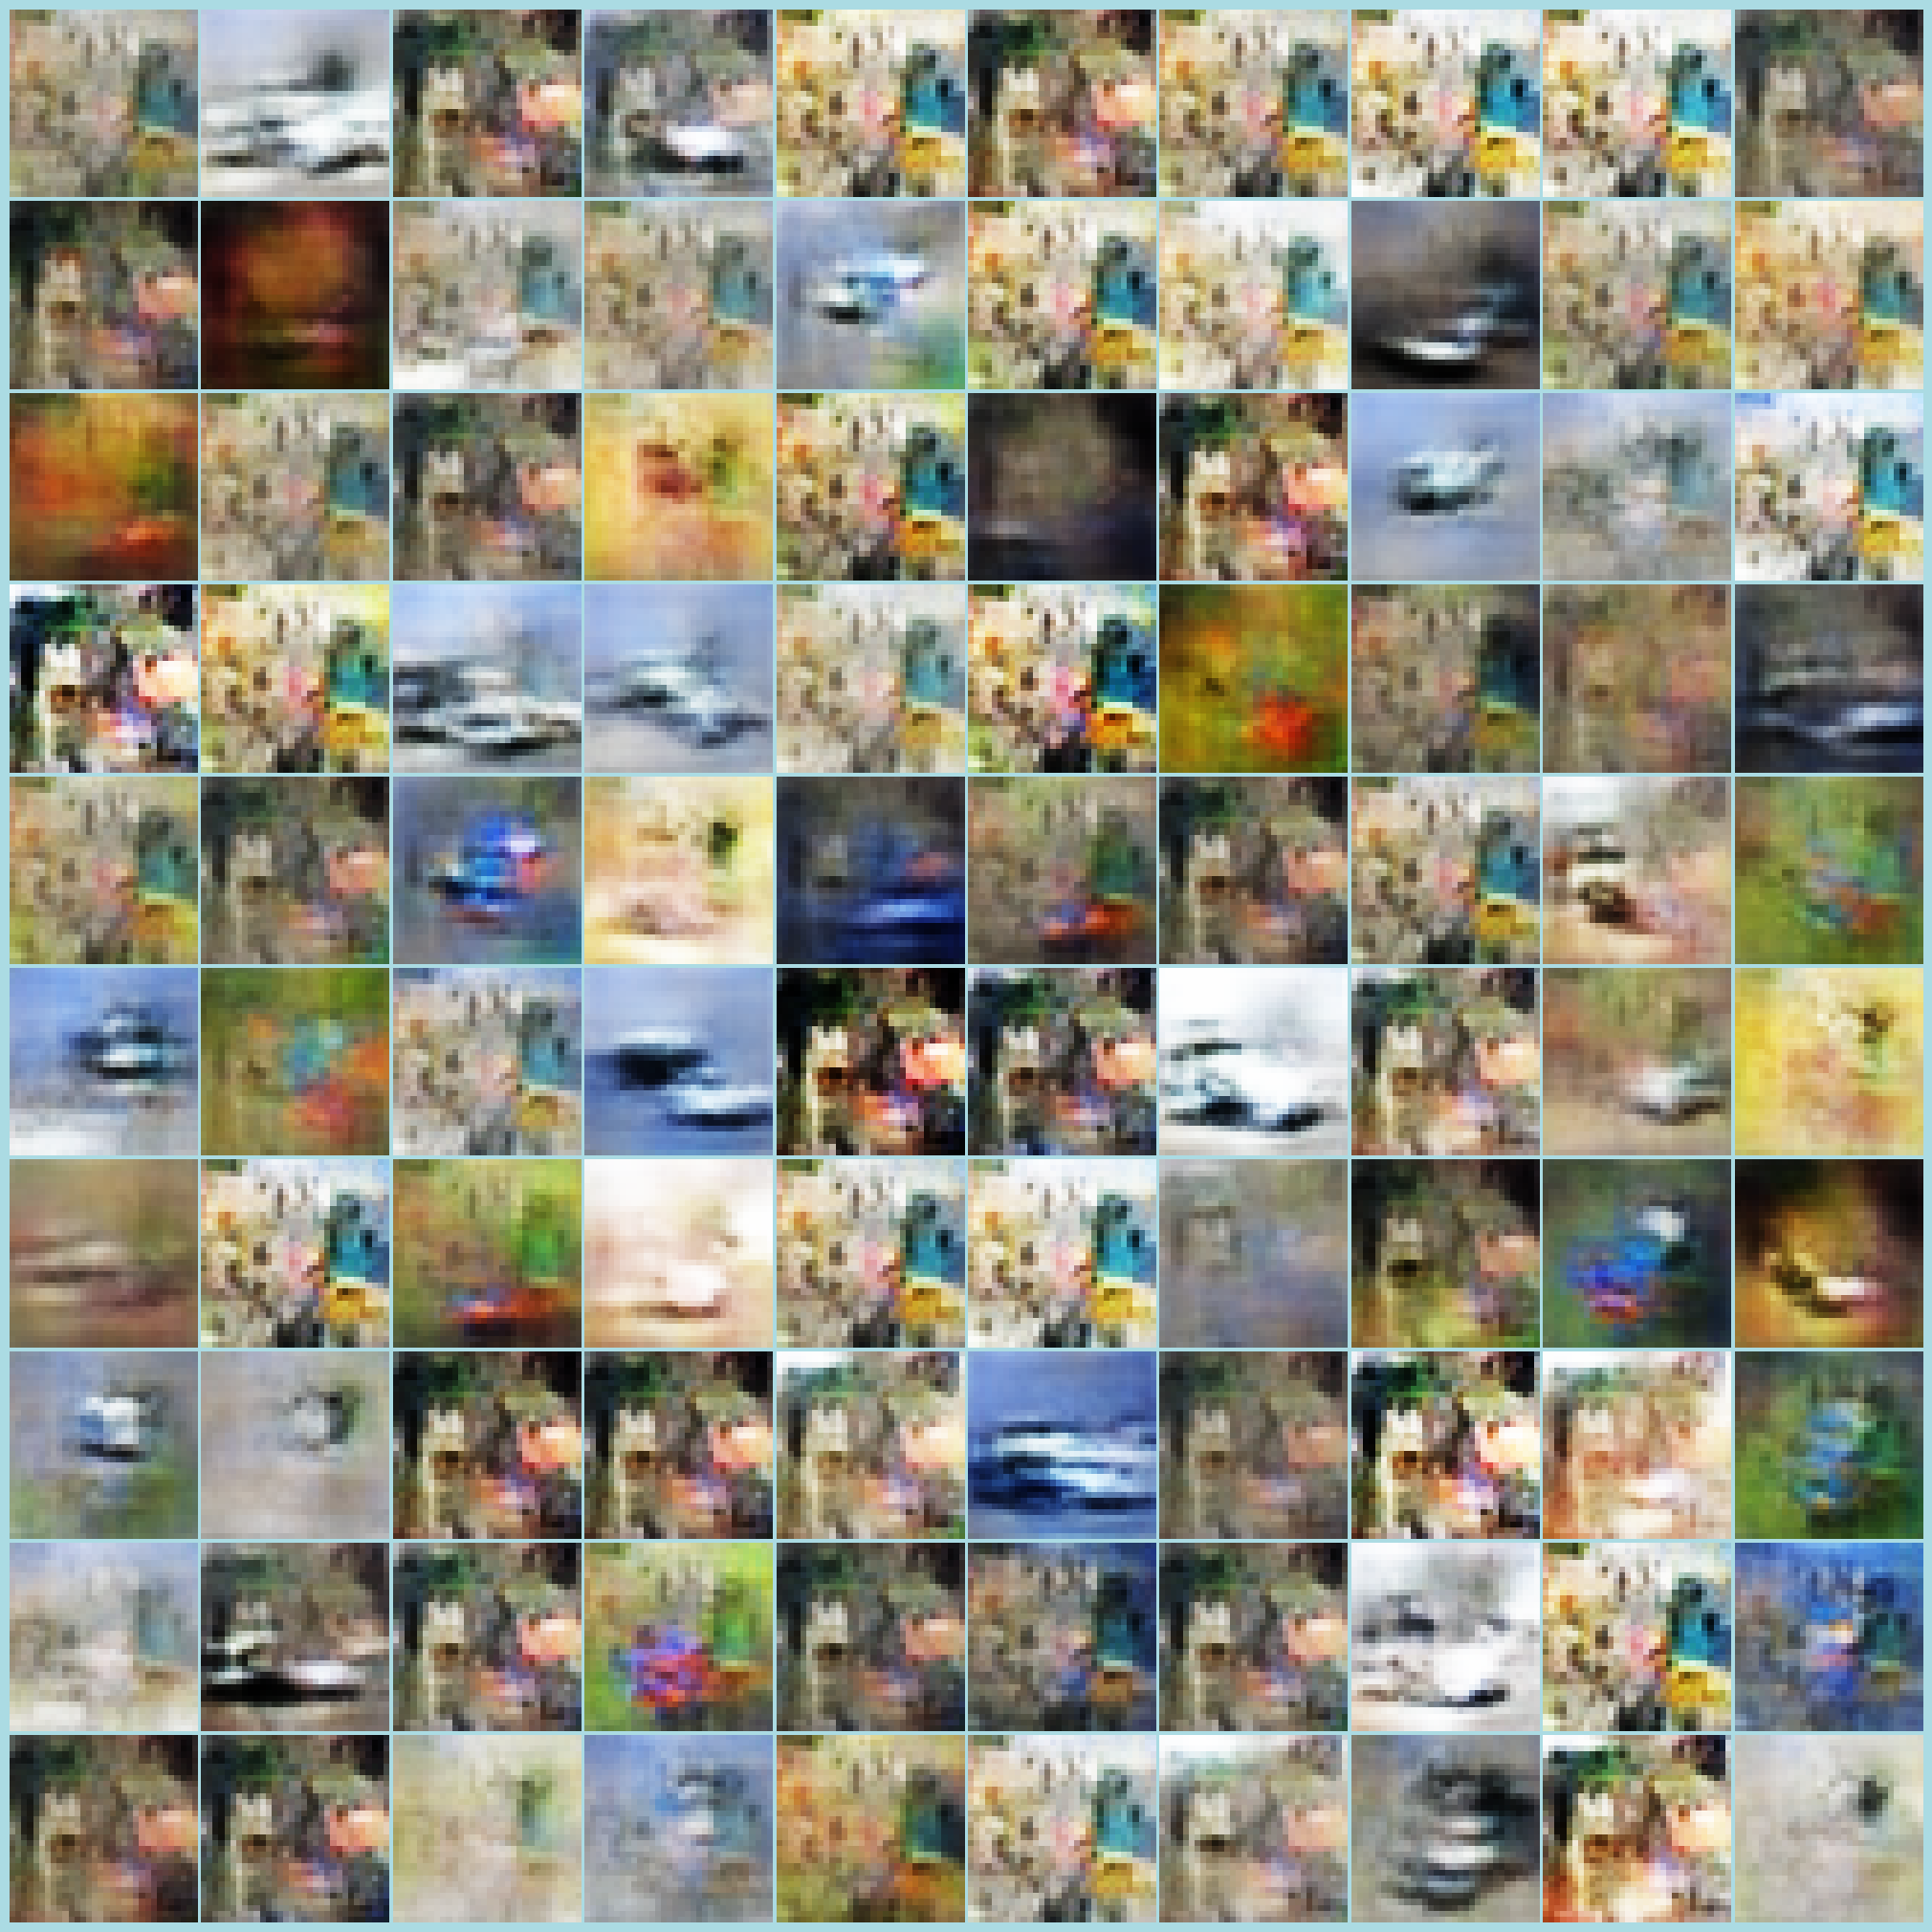

4/4 [==============================] - 0s 1ms/step


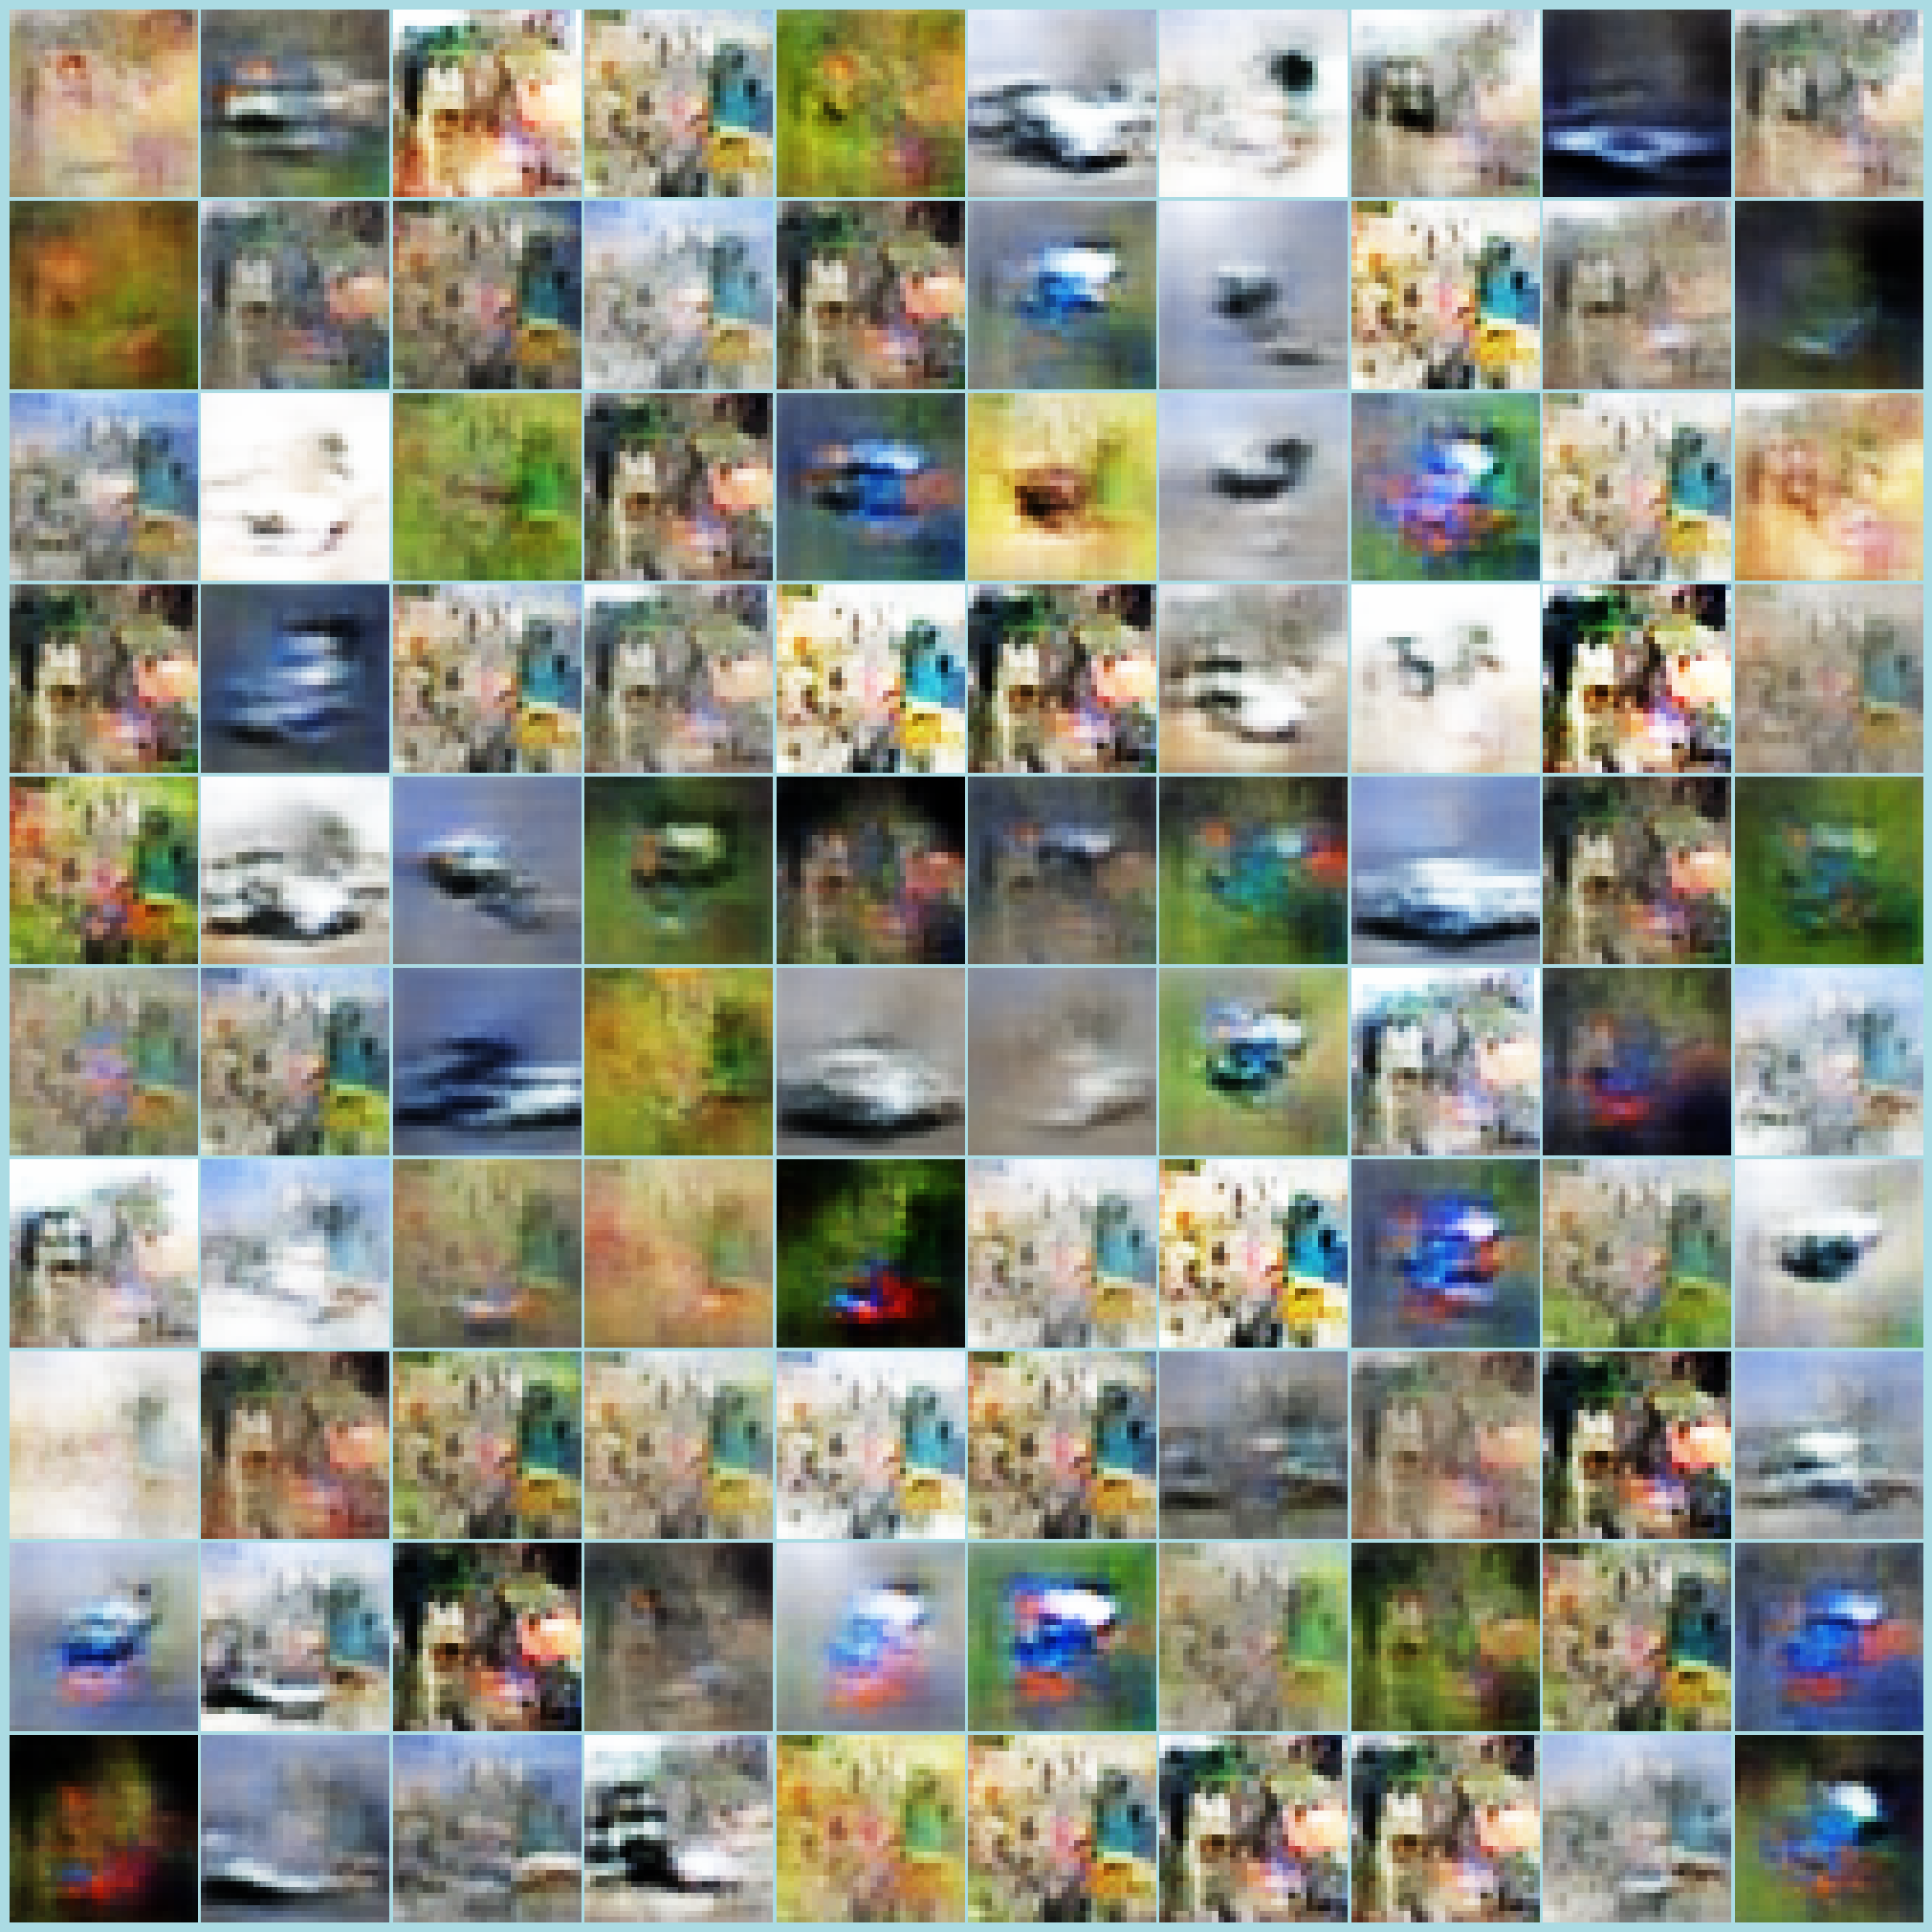

4/4 [==============================] - 0s 1ms/step


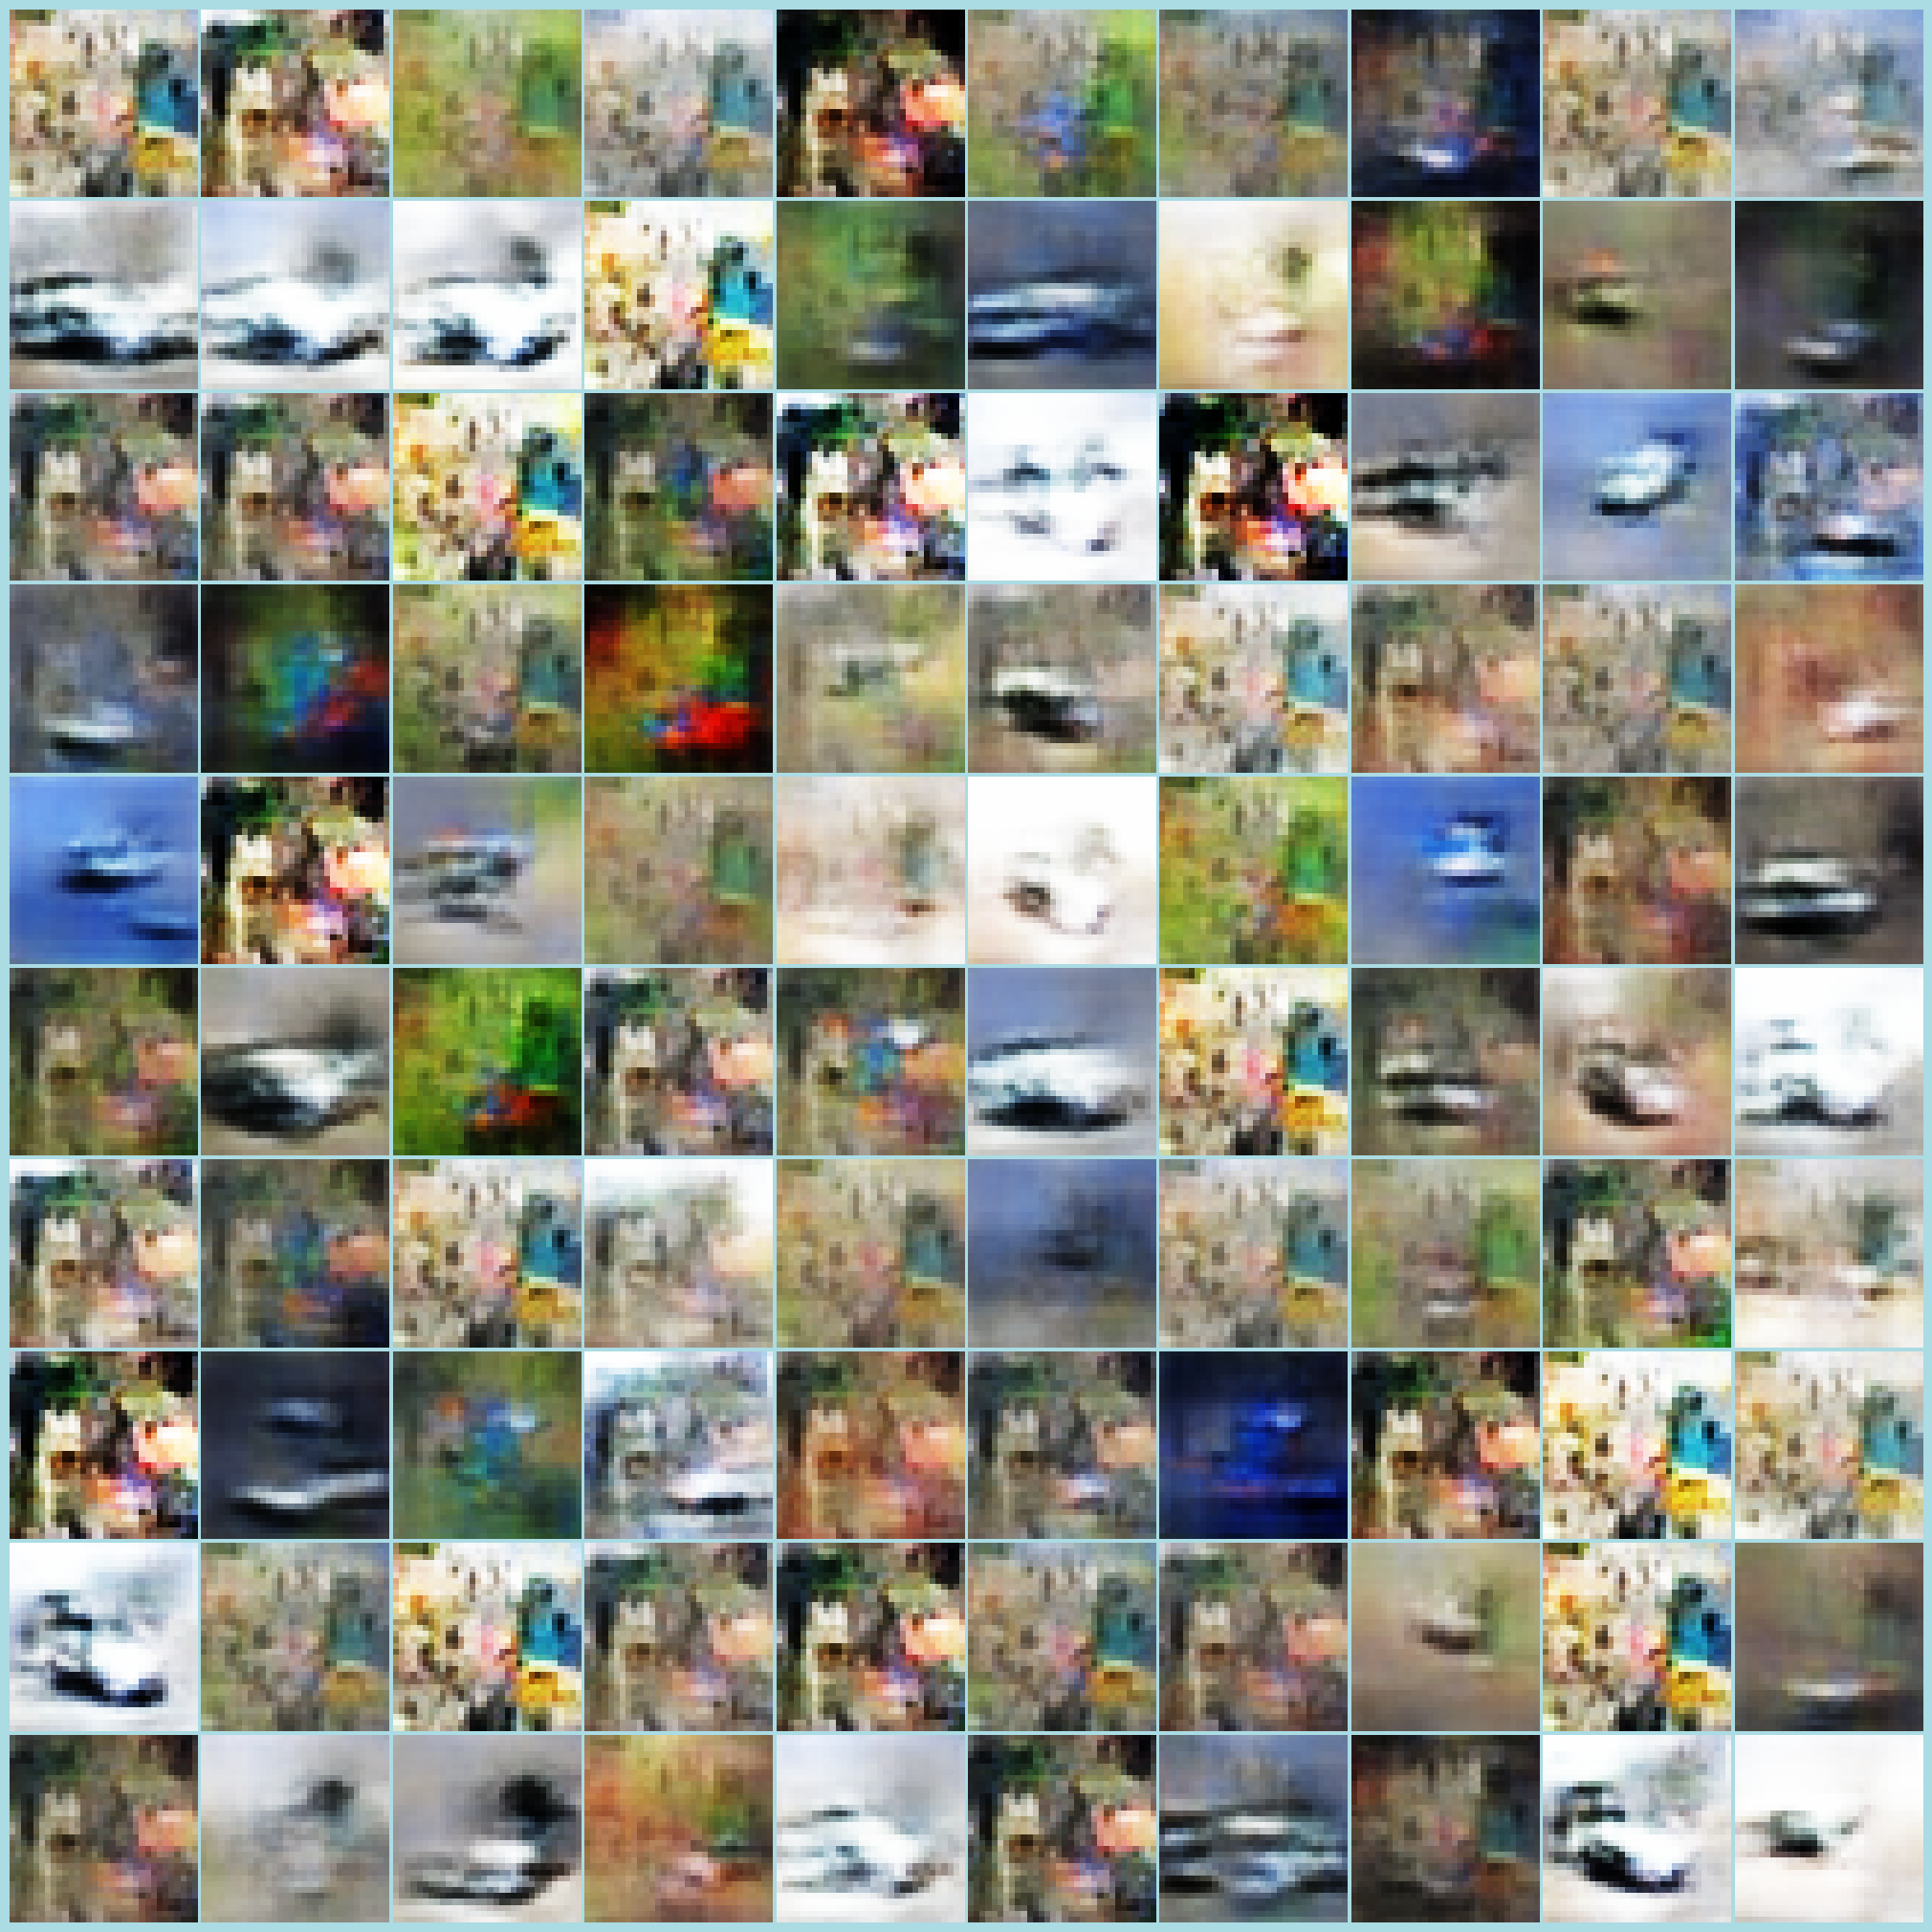

4/4 [==============================] - 0s 1ms/step


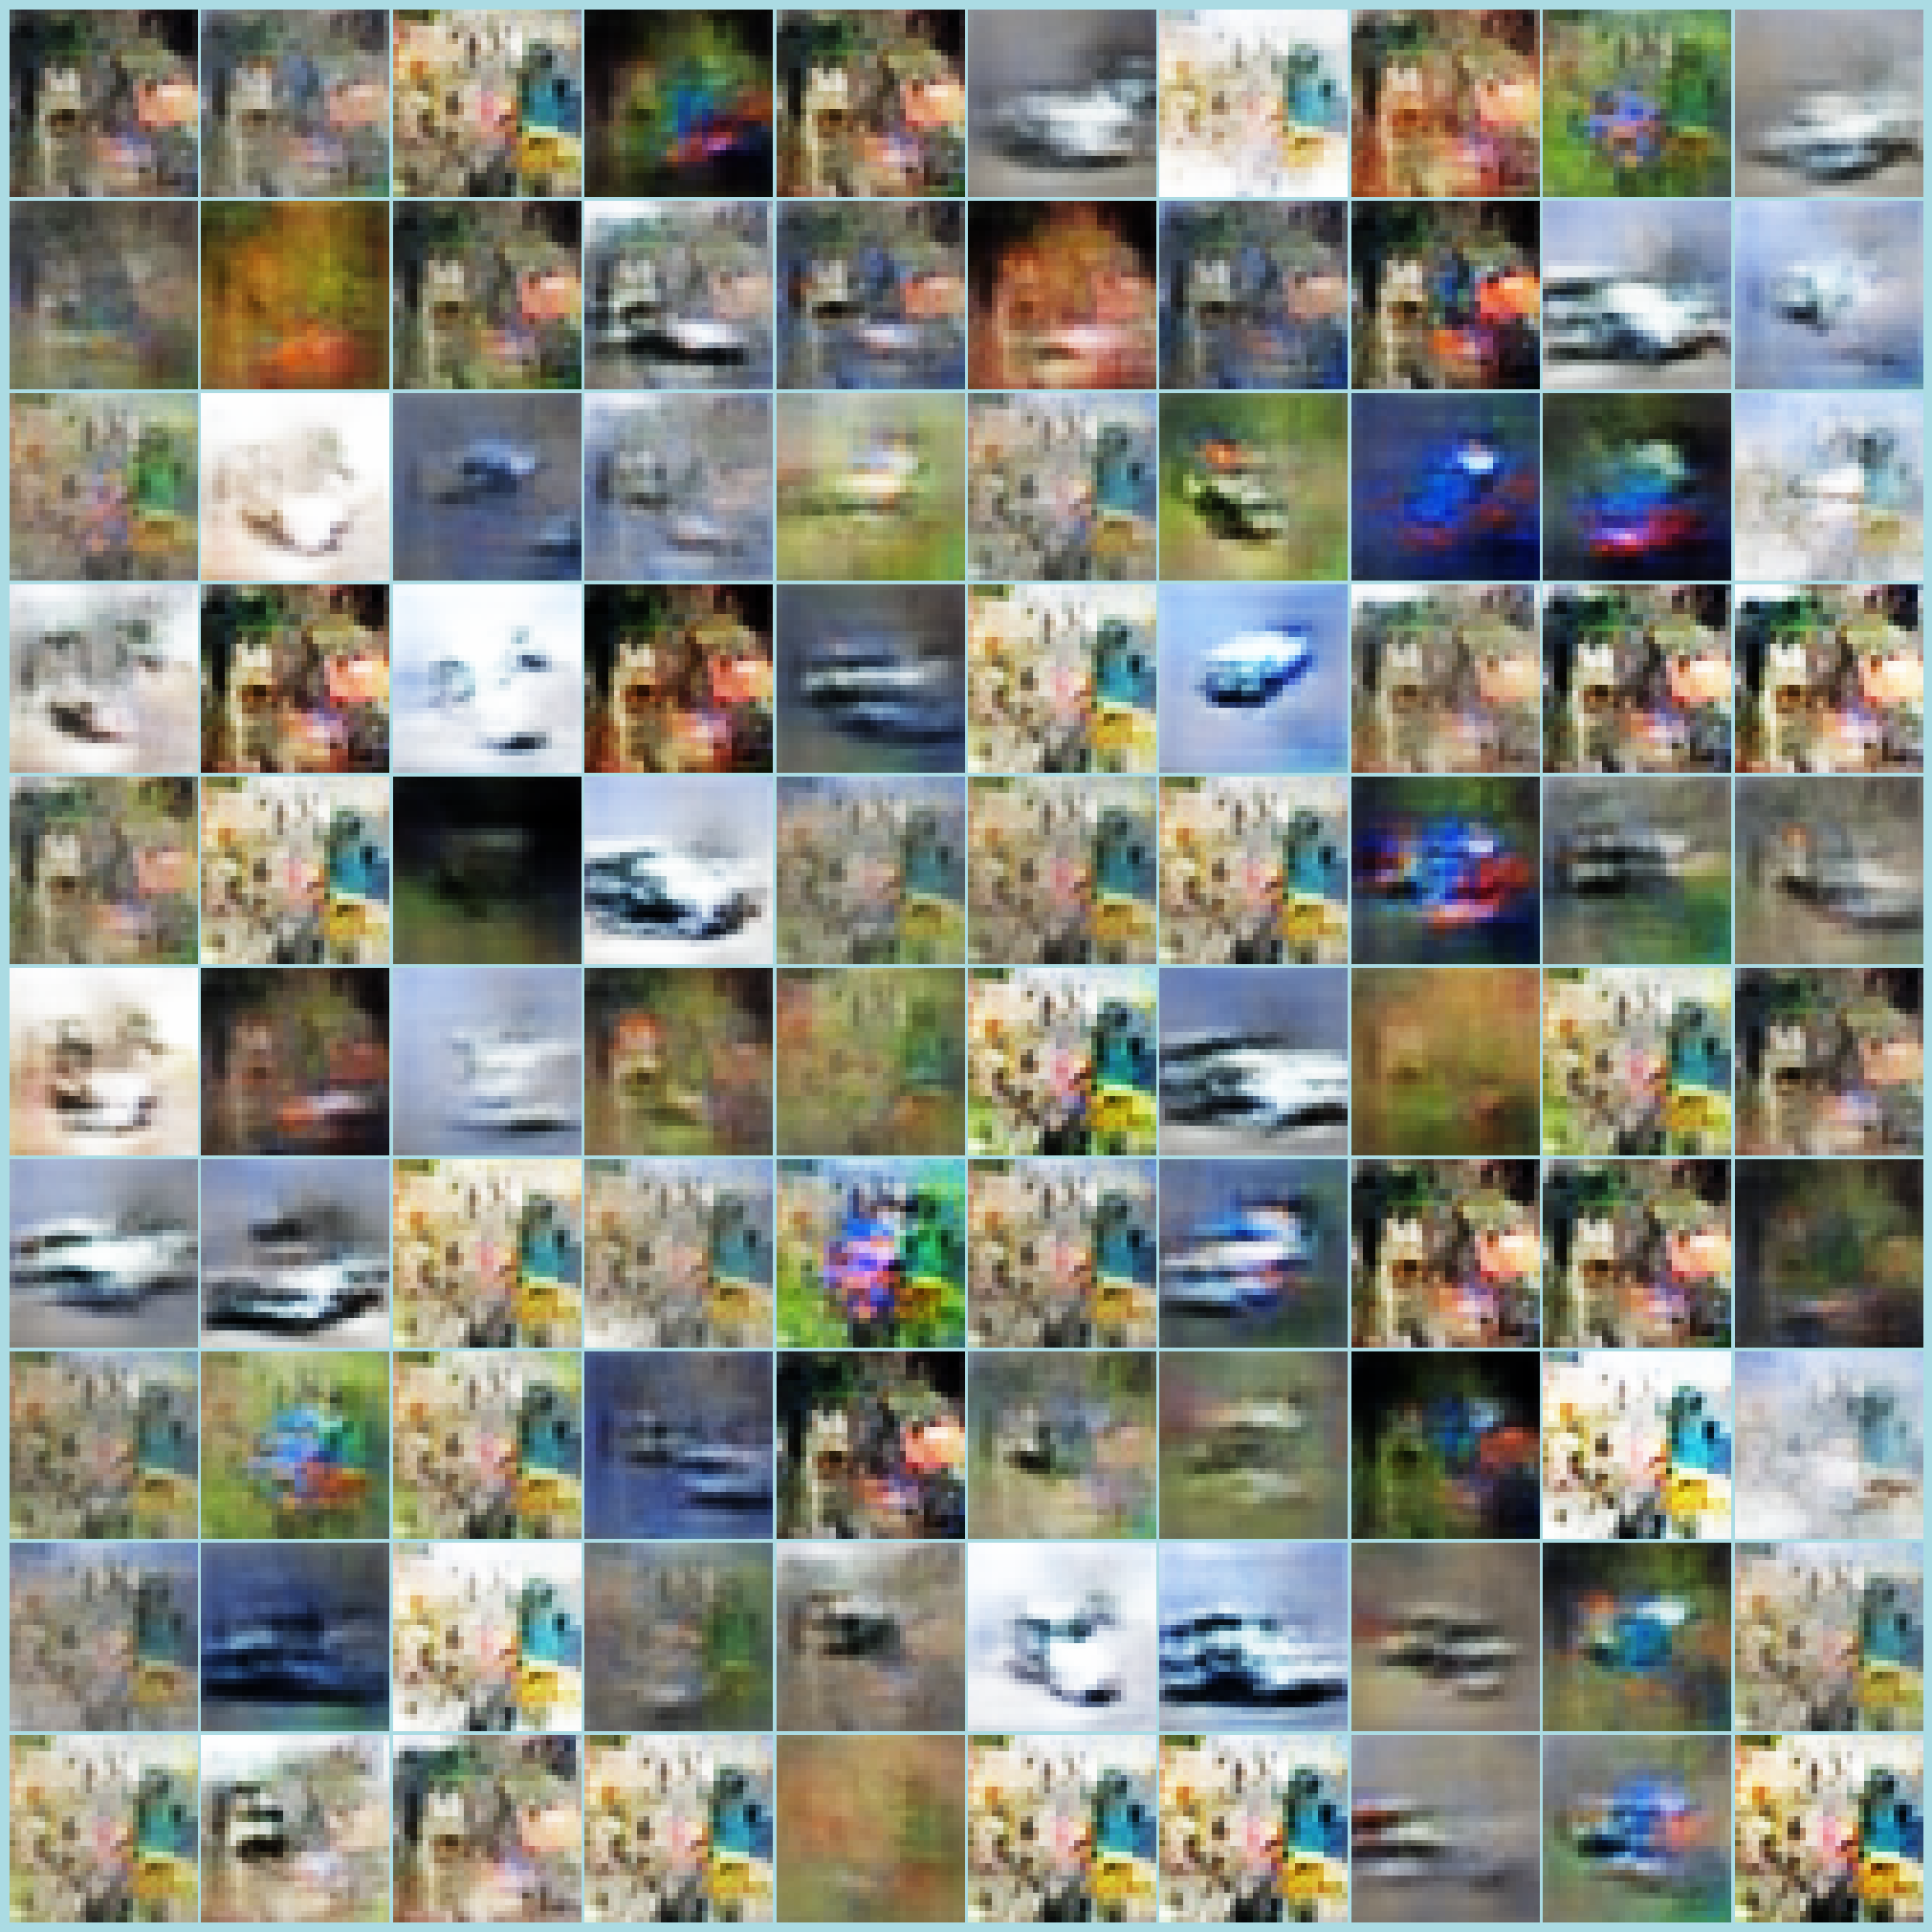

4/4 [==============================] - 0s 1ms/step


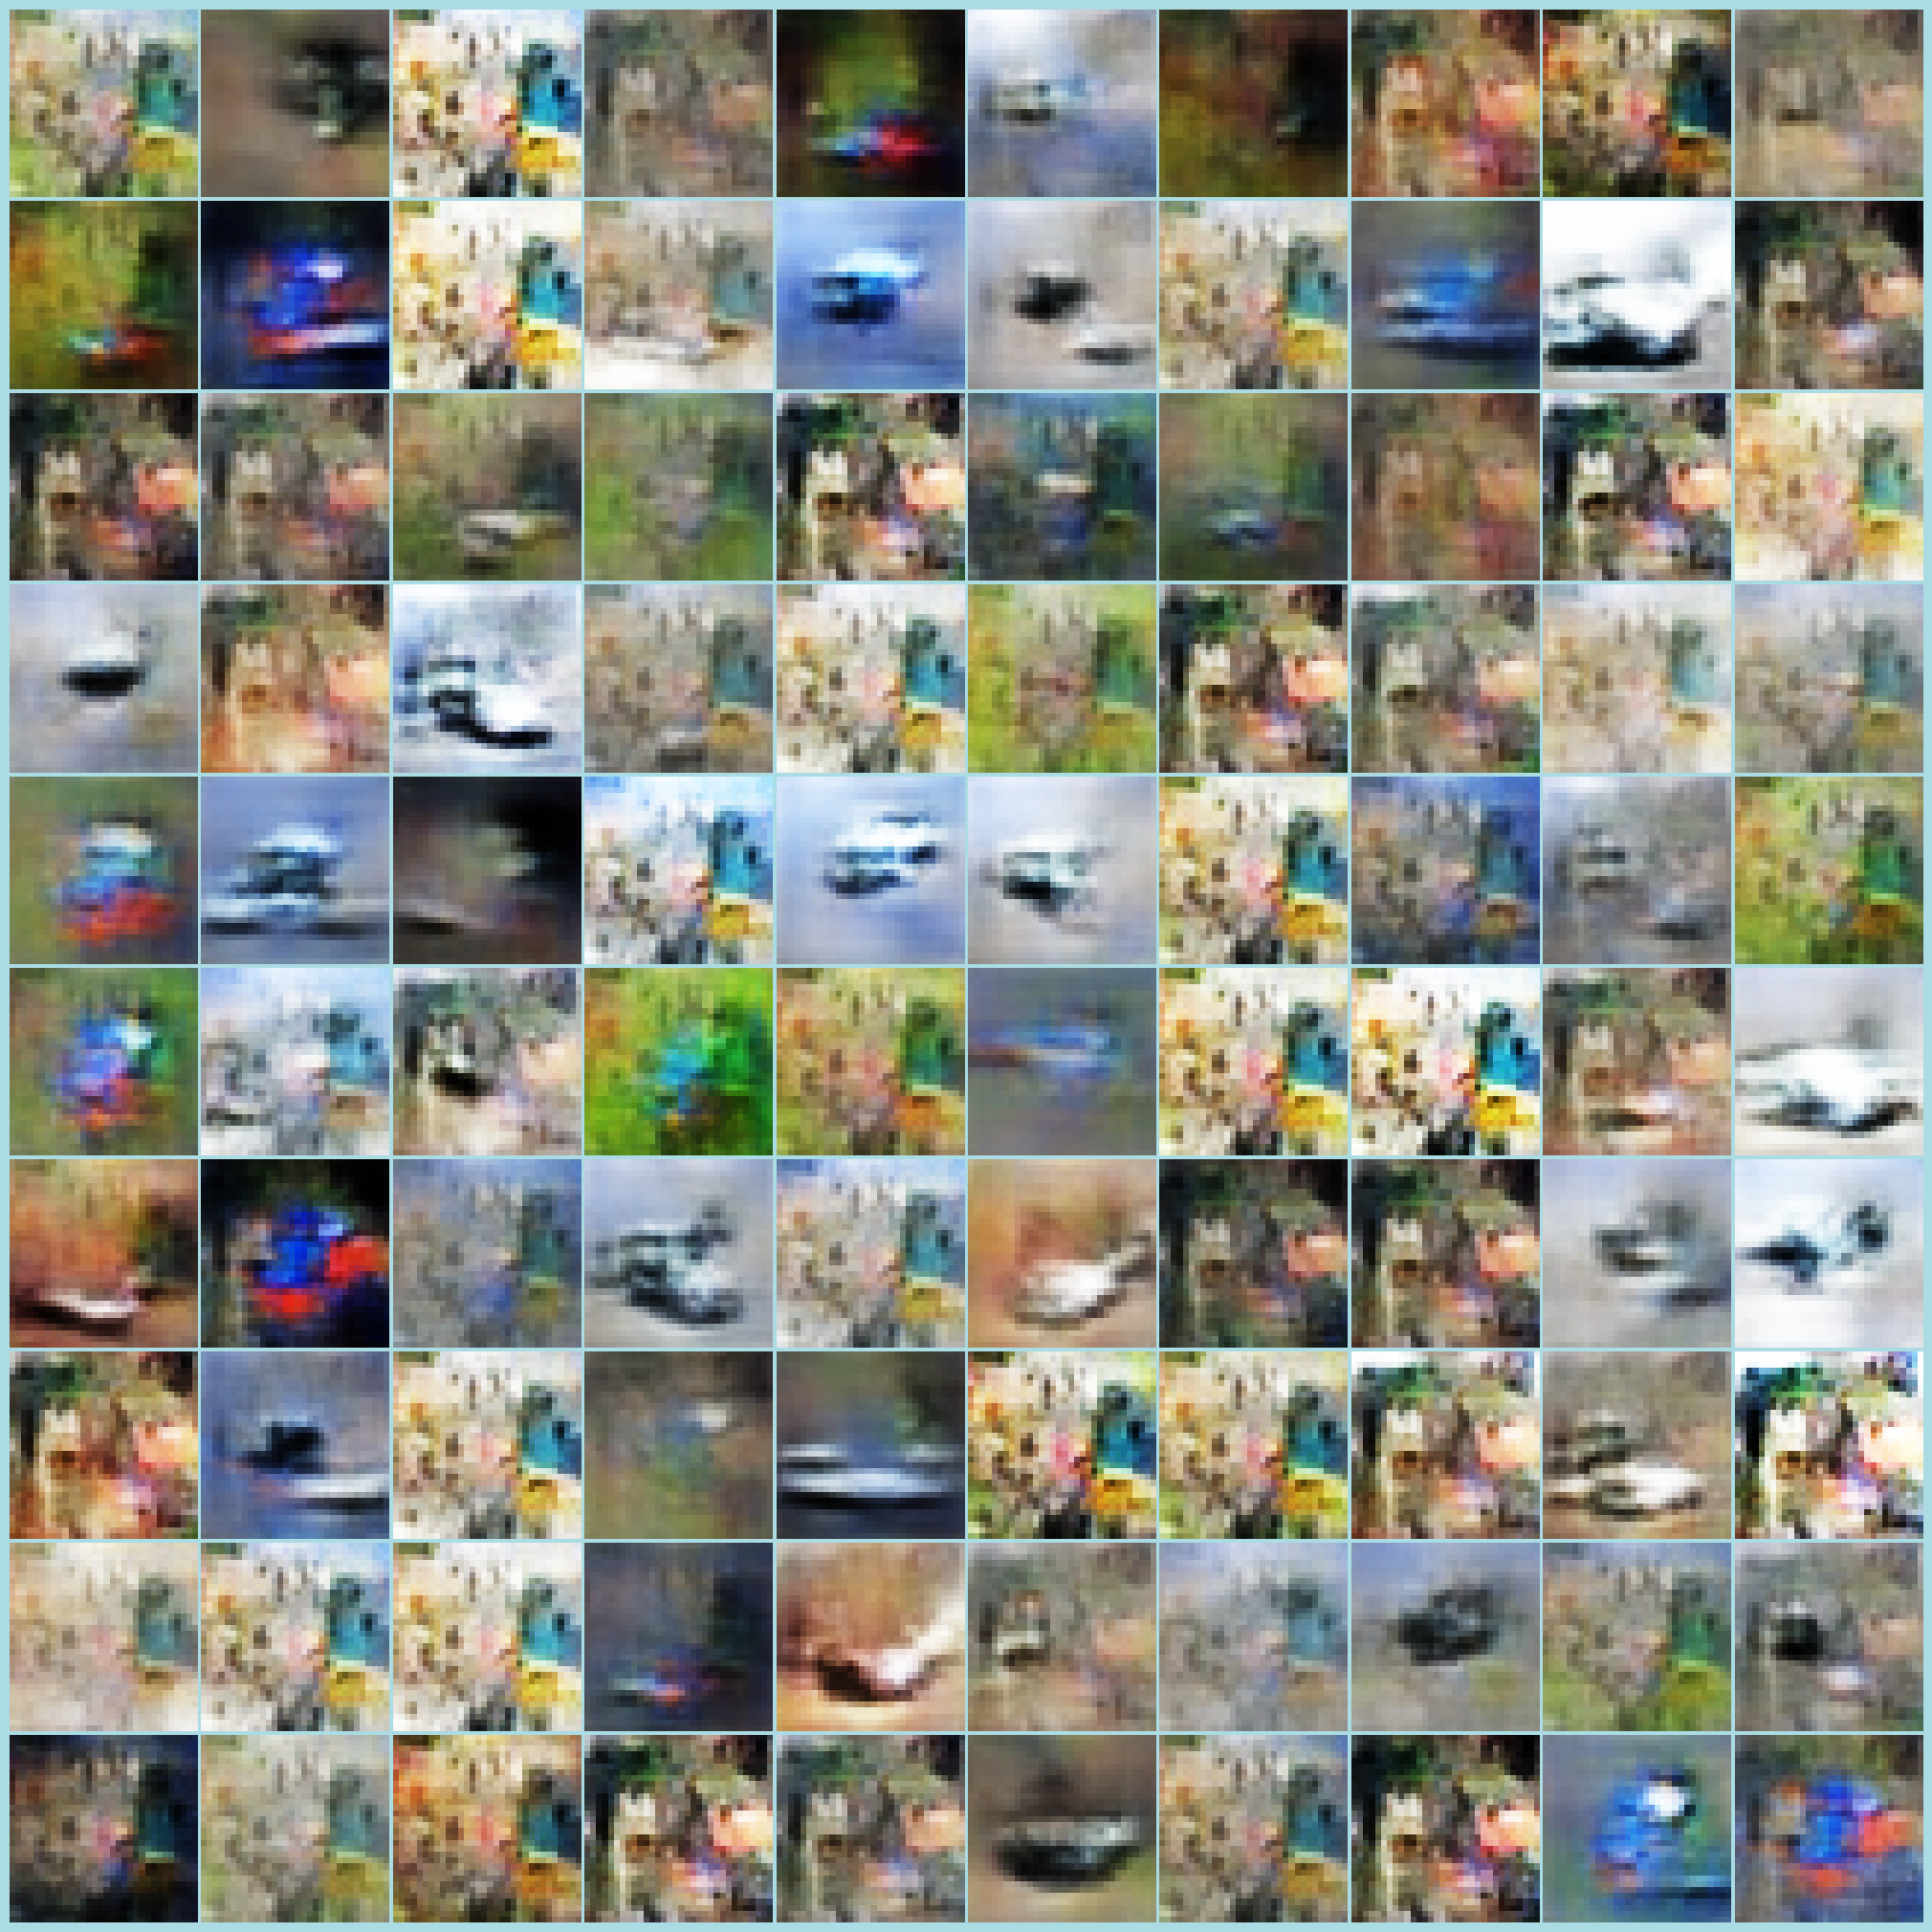

4/4 [==============================] - 0s 1ms/step


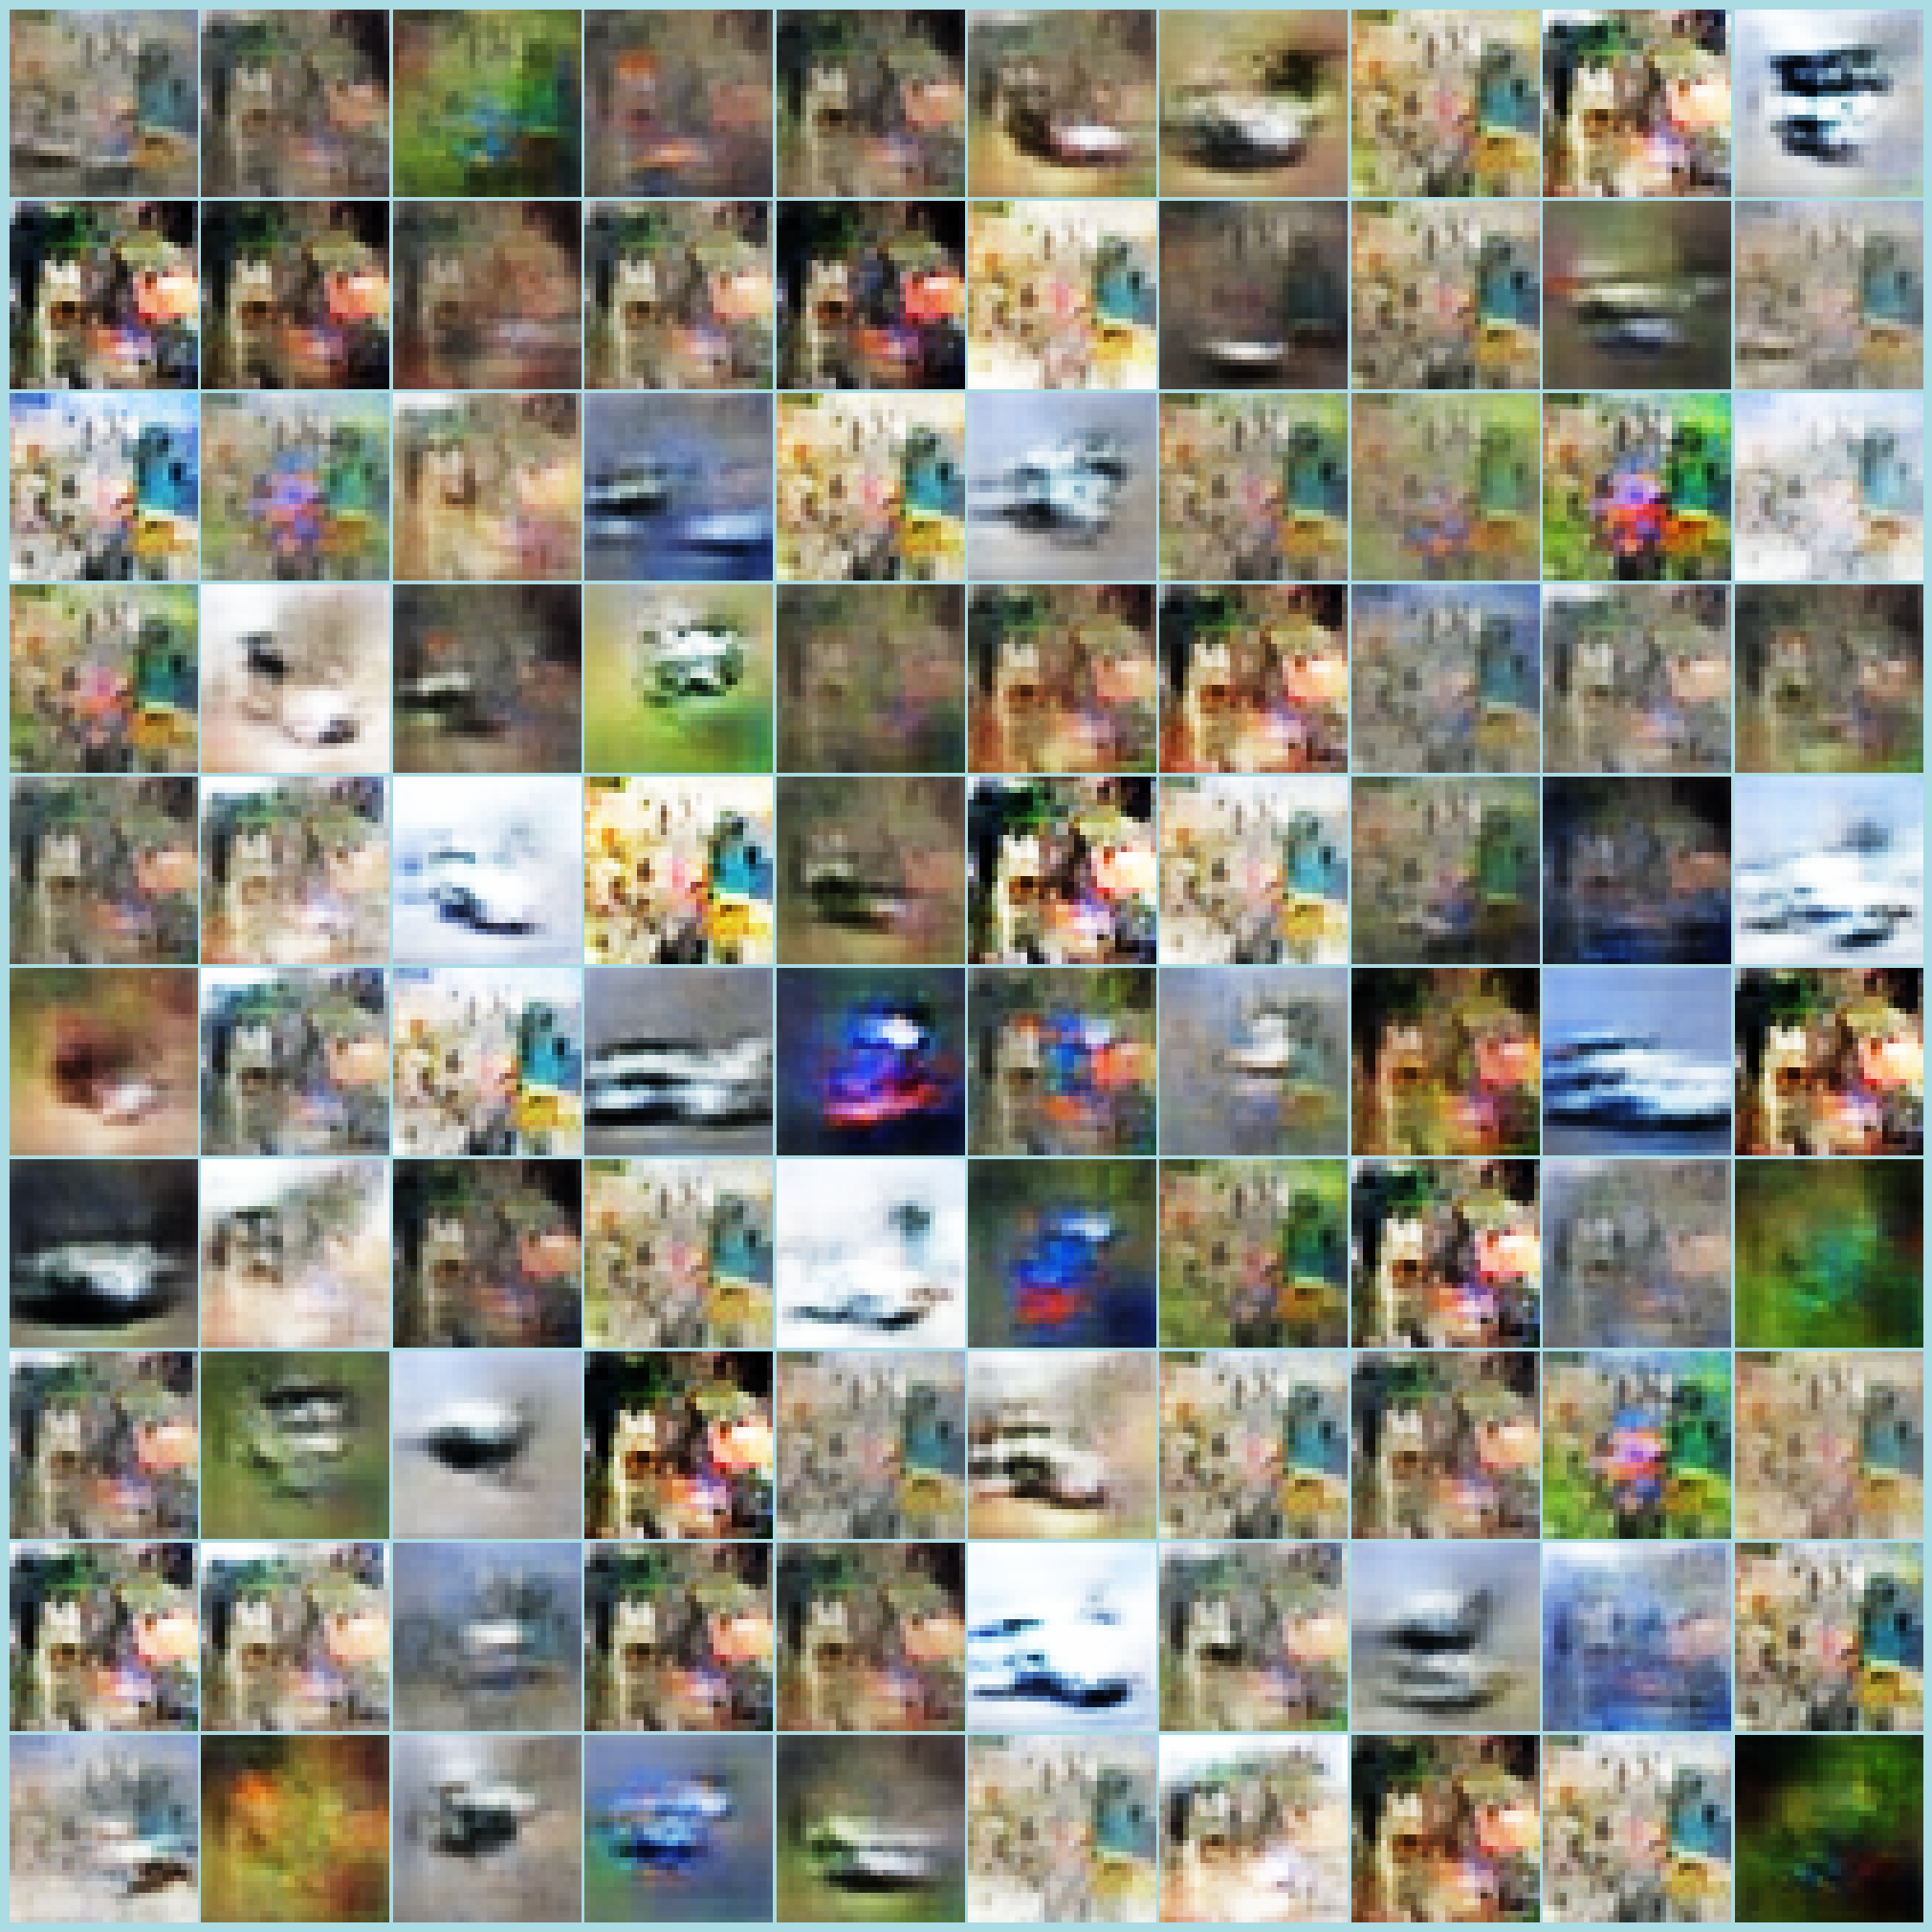

4/4 [==============================] - 0s 1ms/step


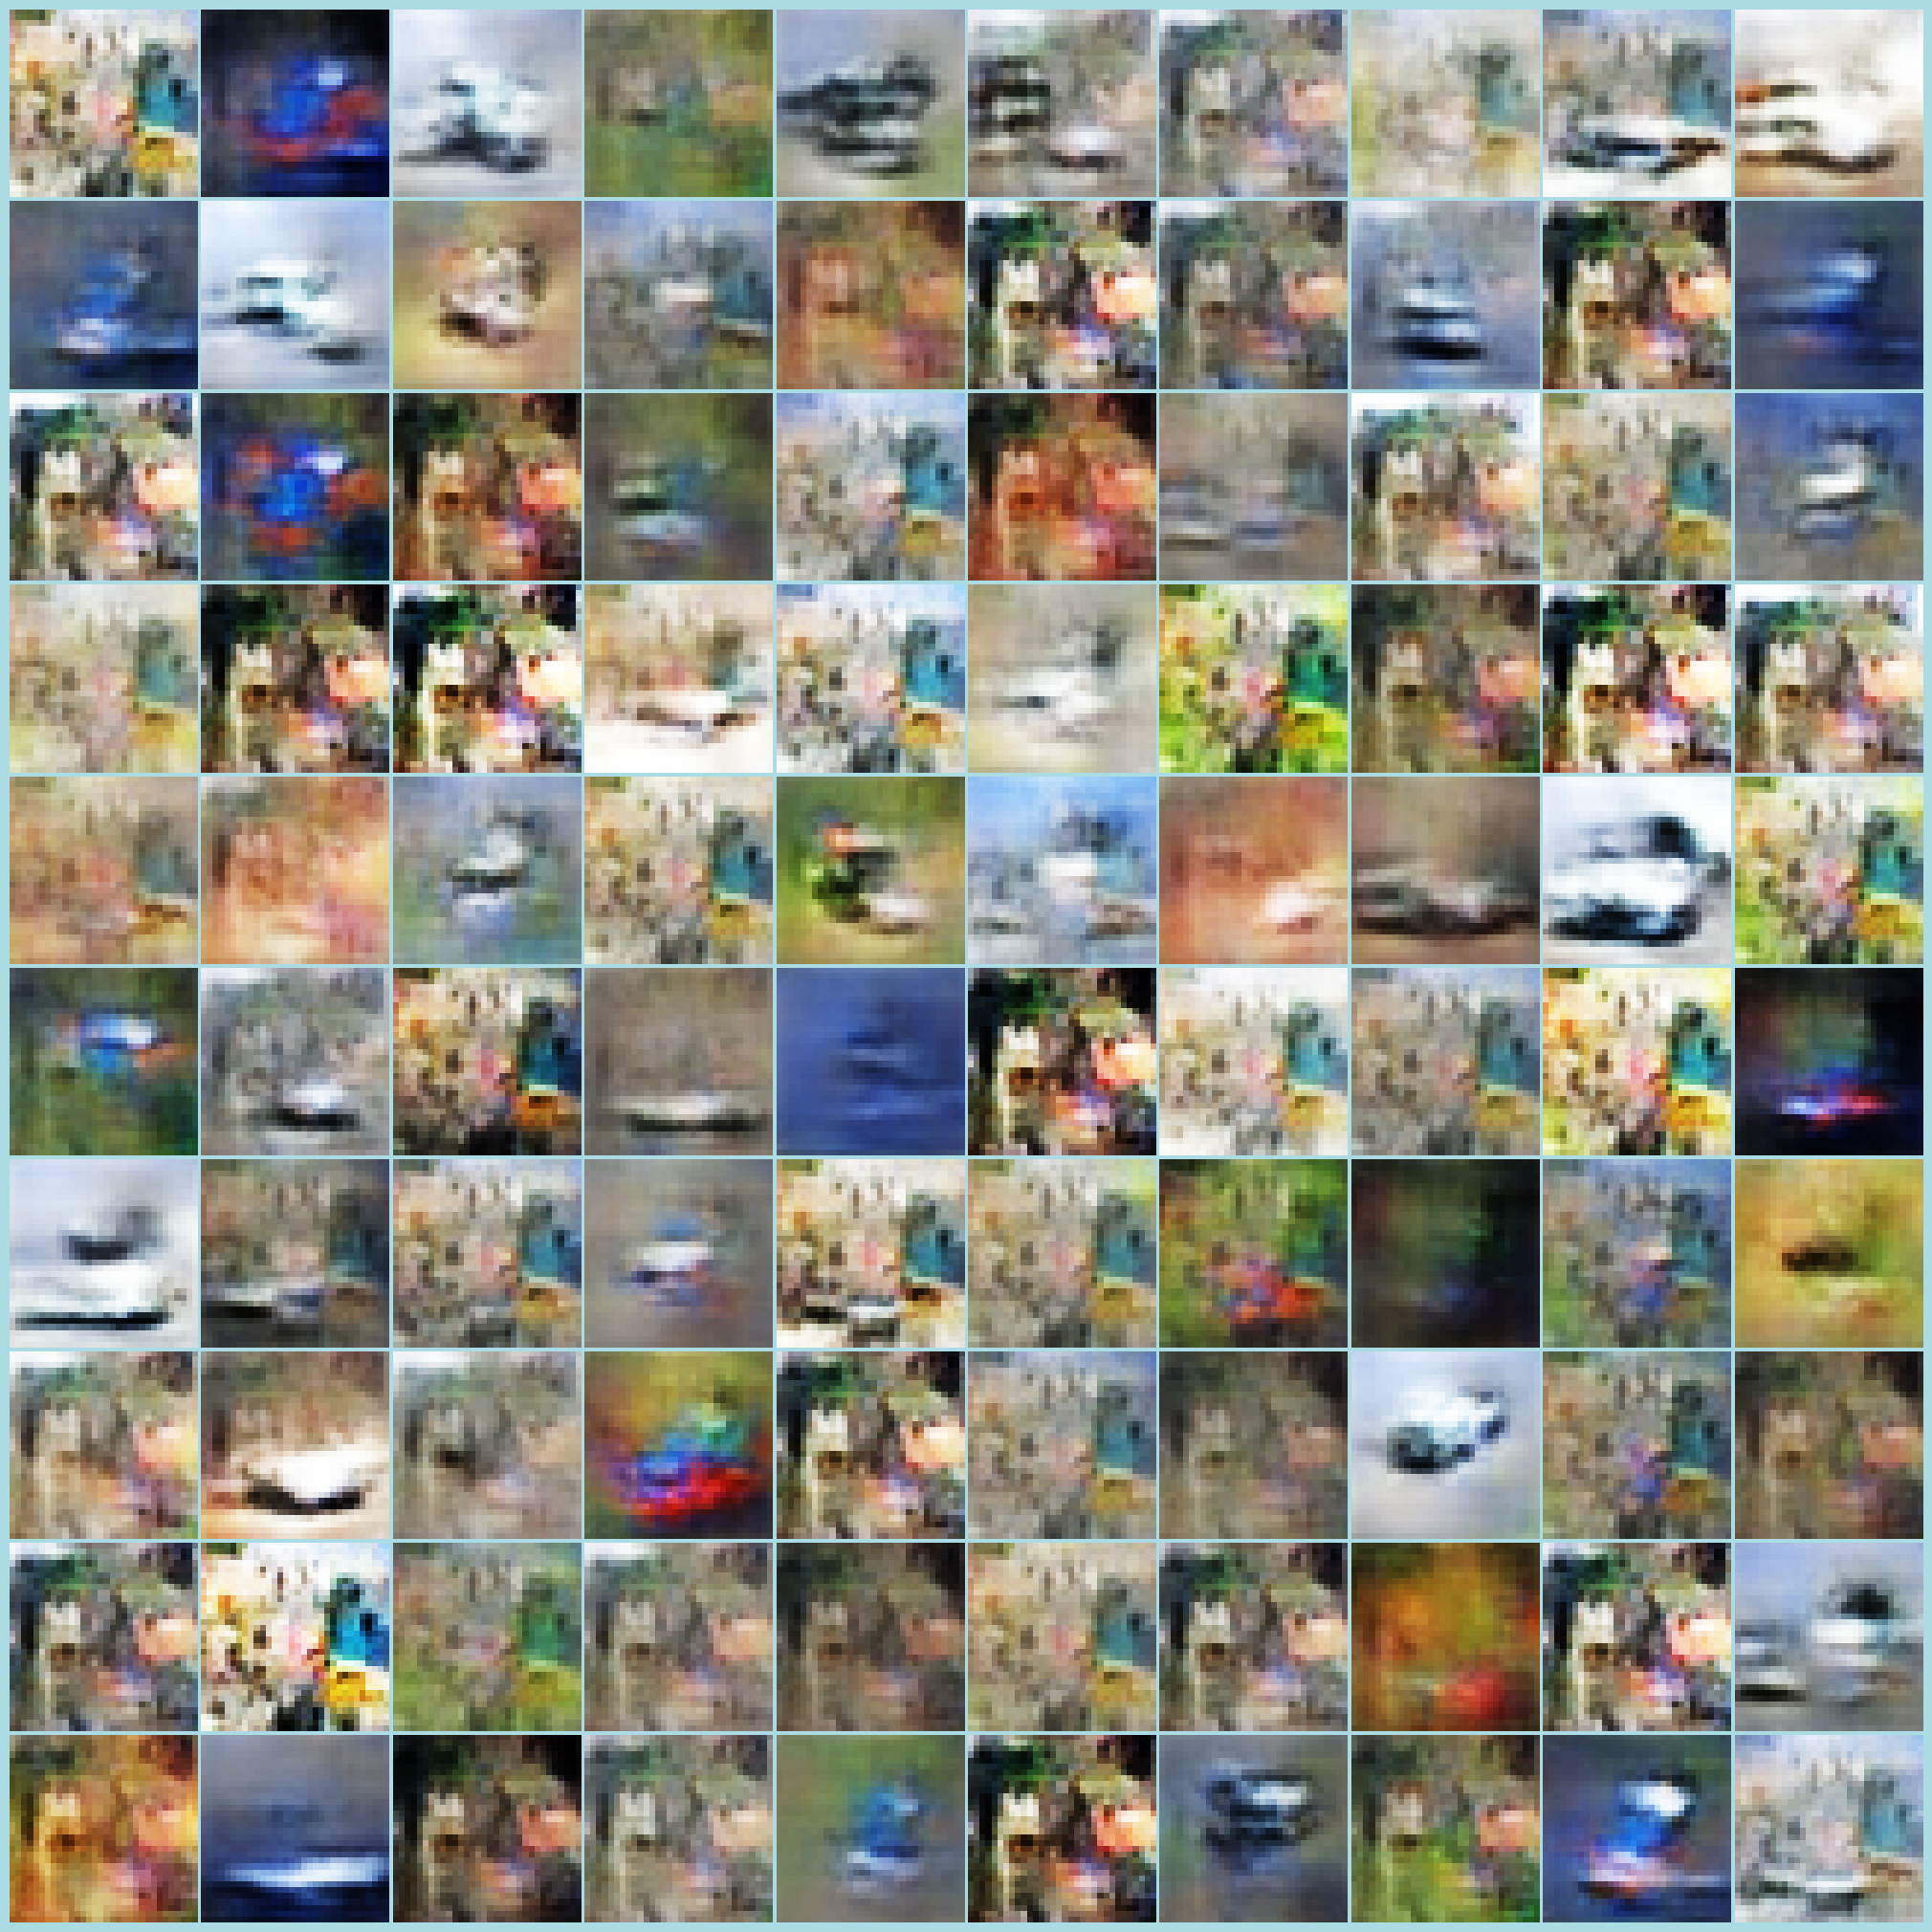

4/4 [==============================] - 0s 1ms/step


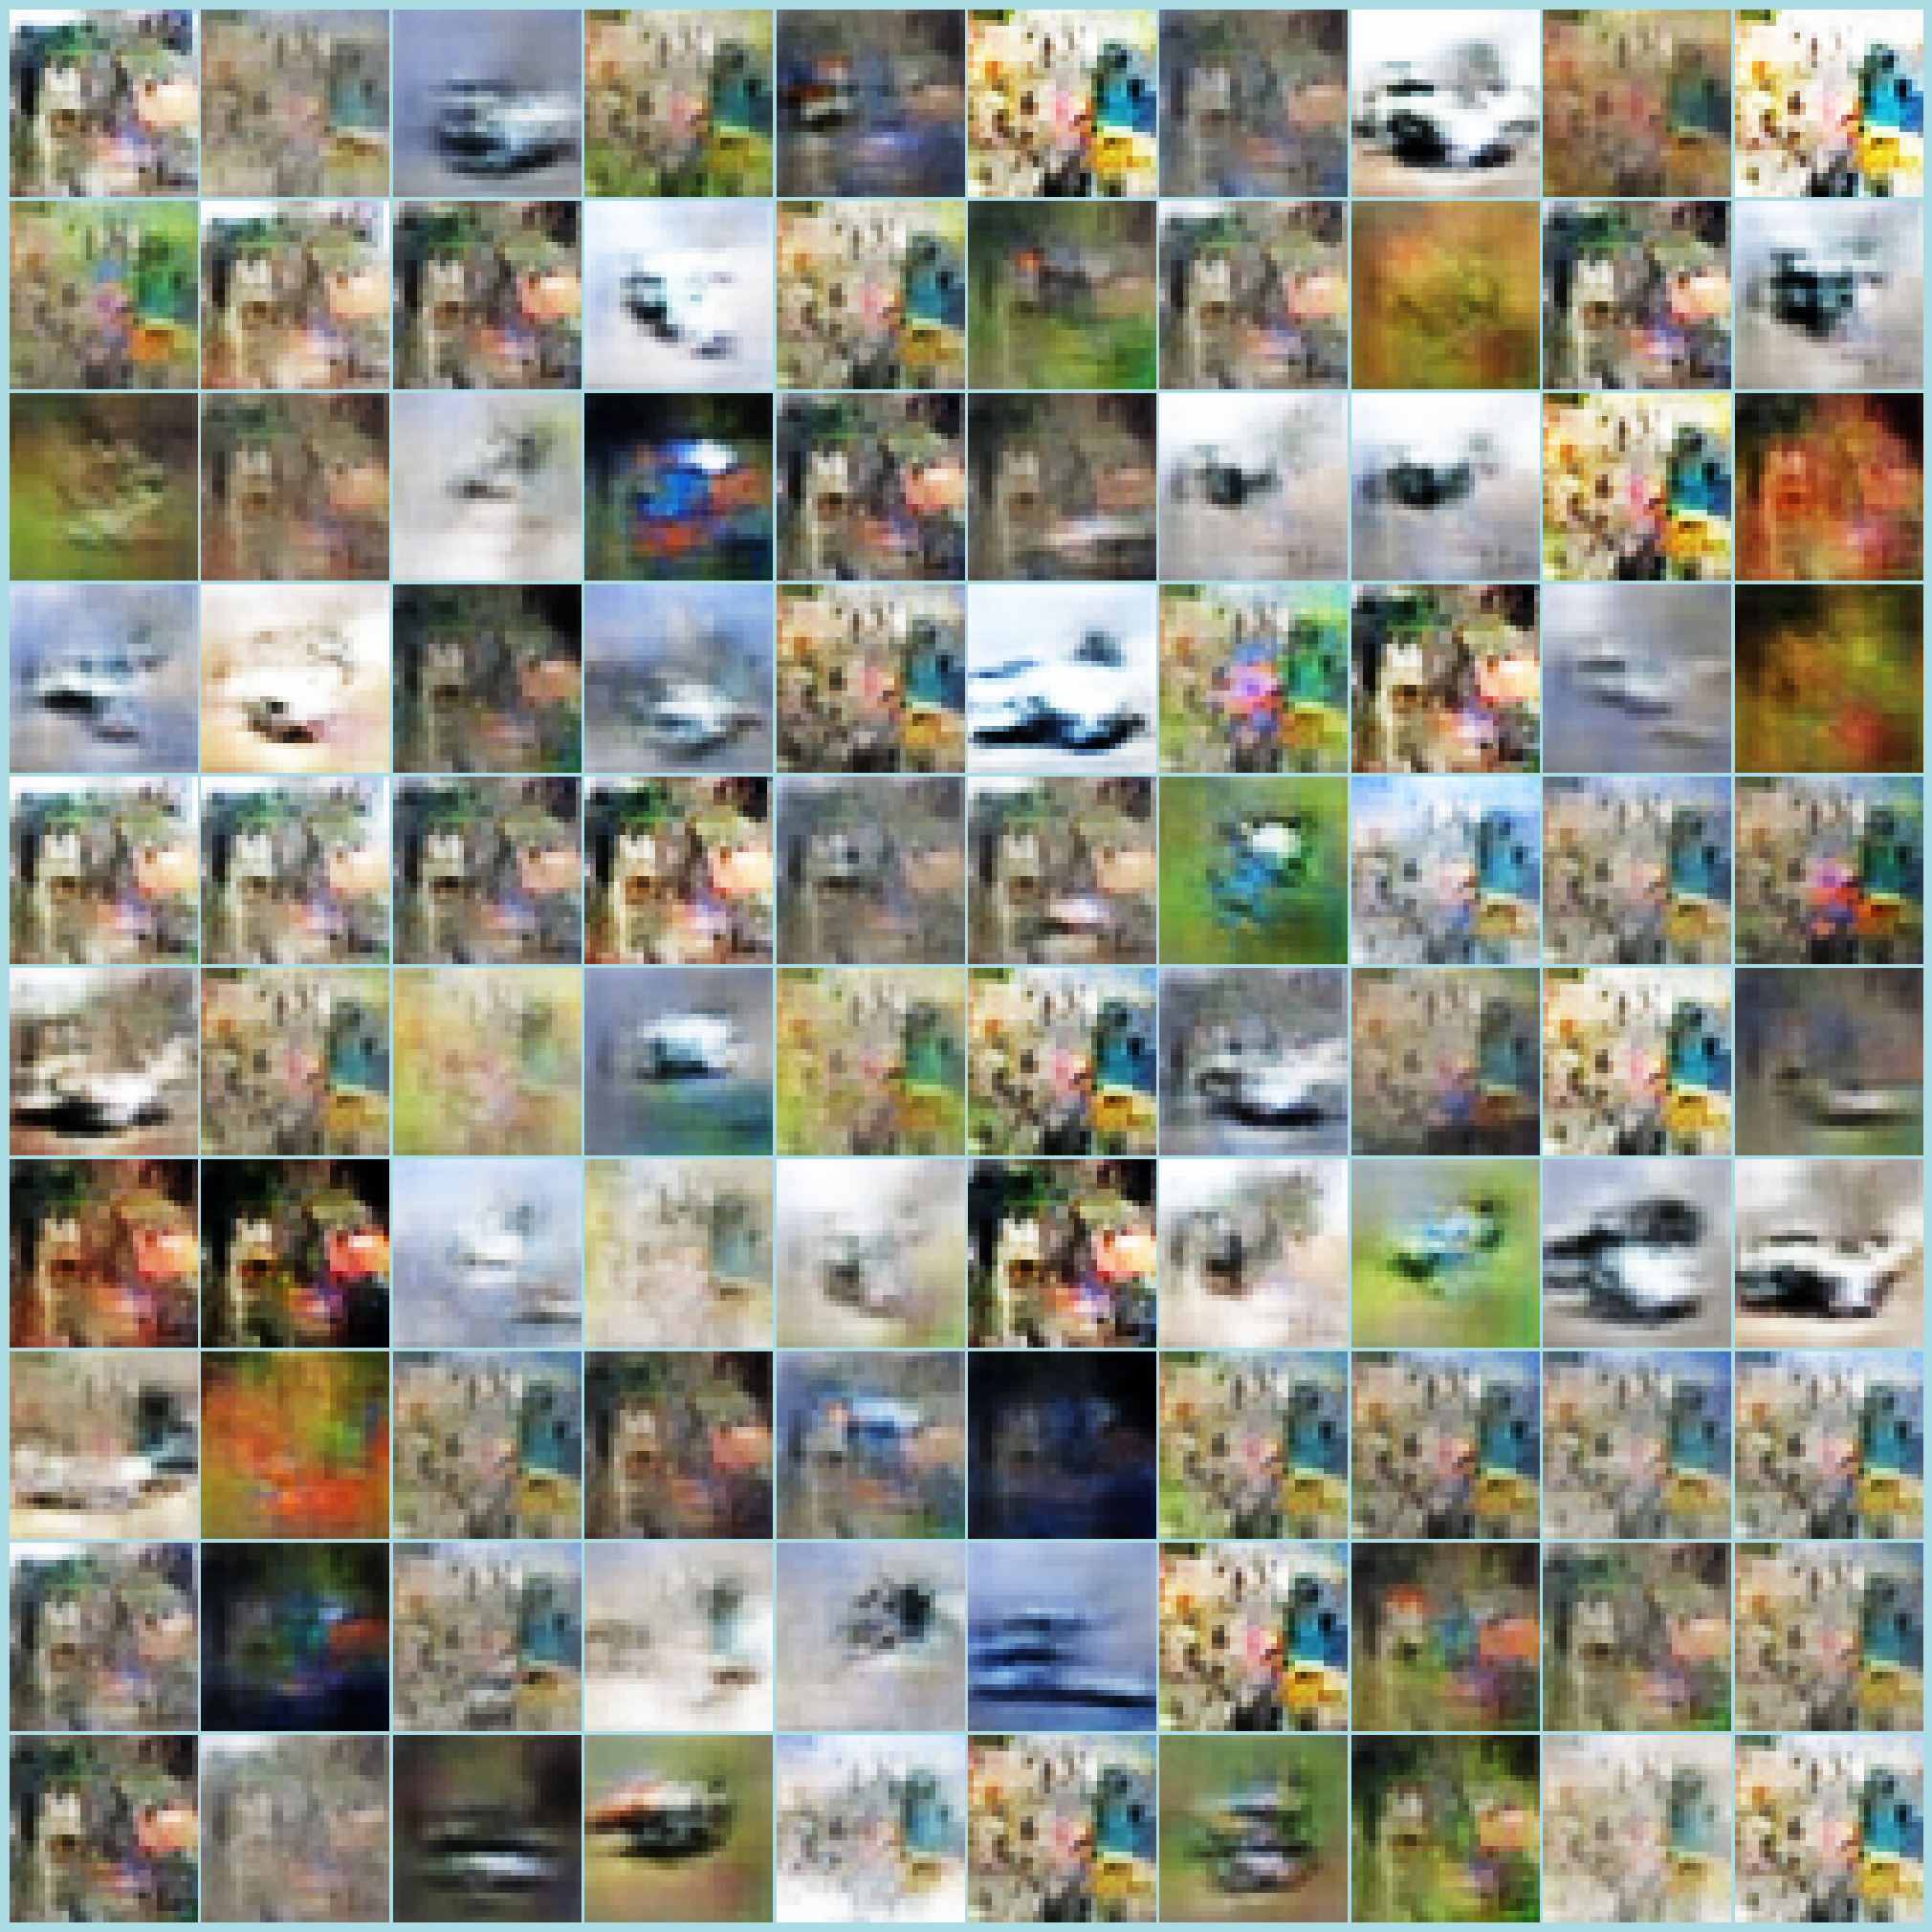

4/4 [==============================] - 0s 969us/step


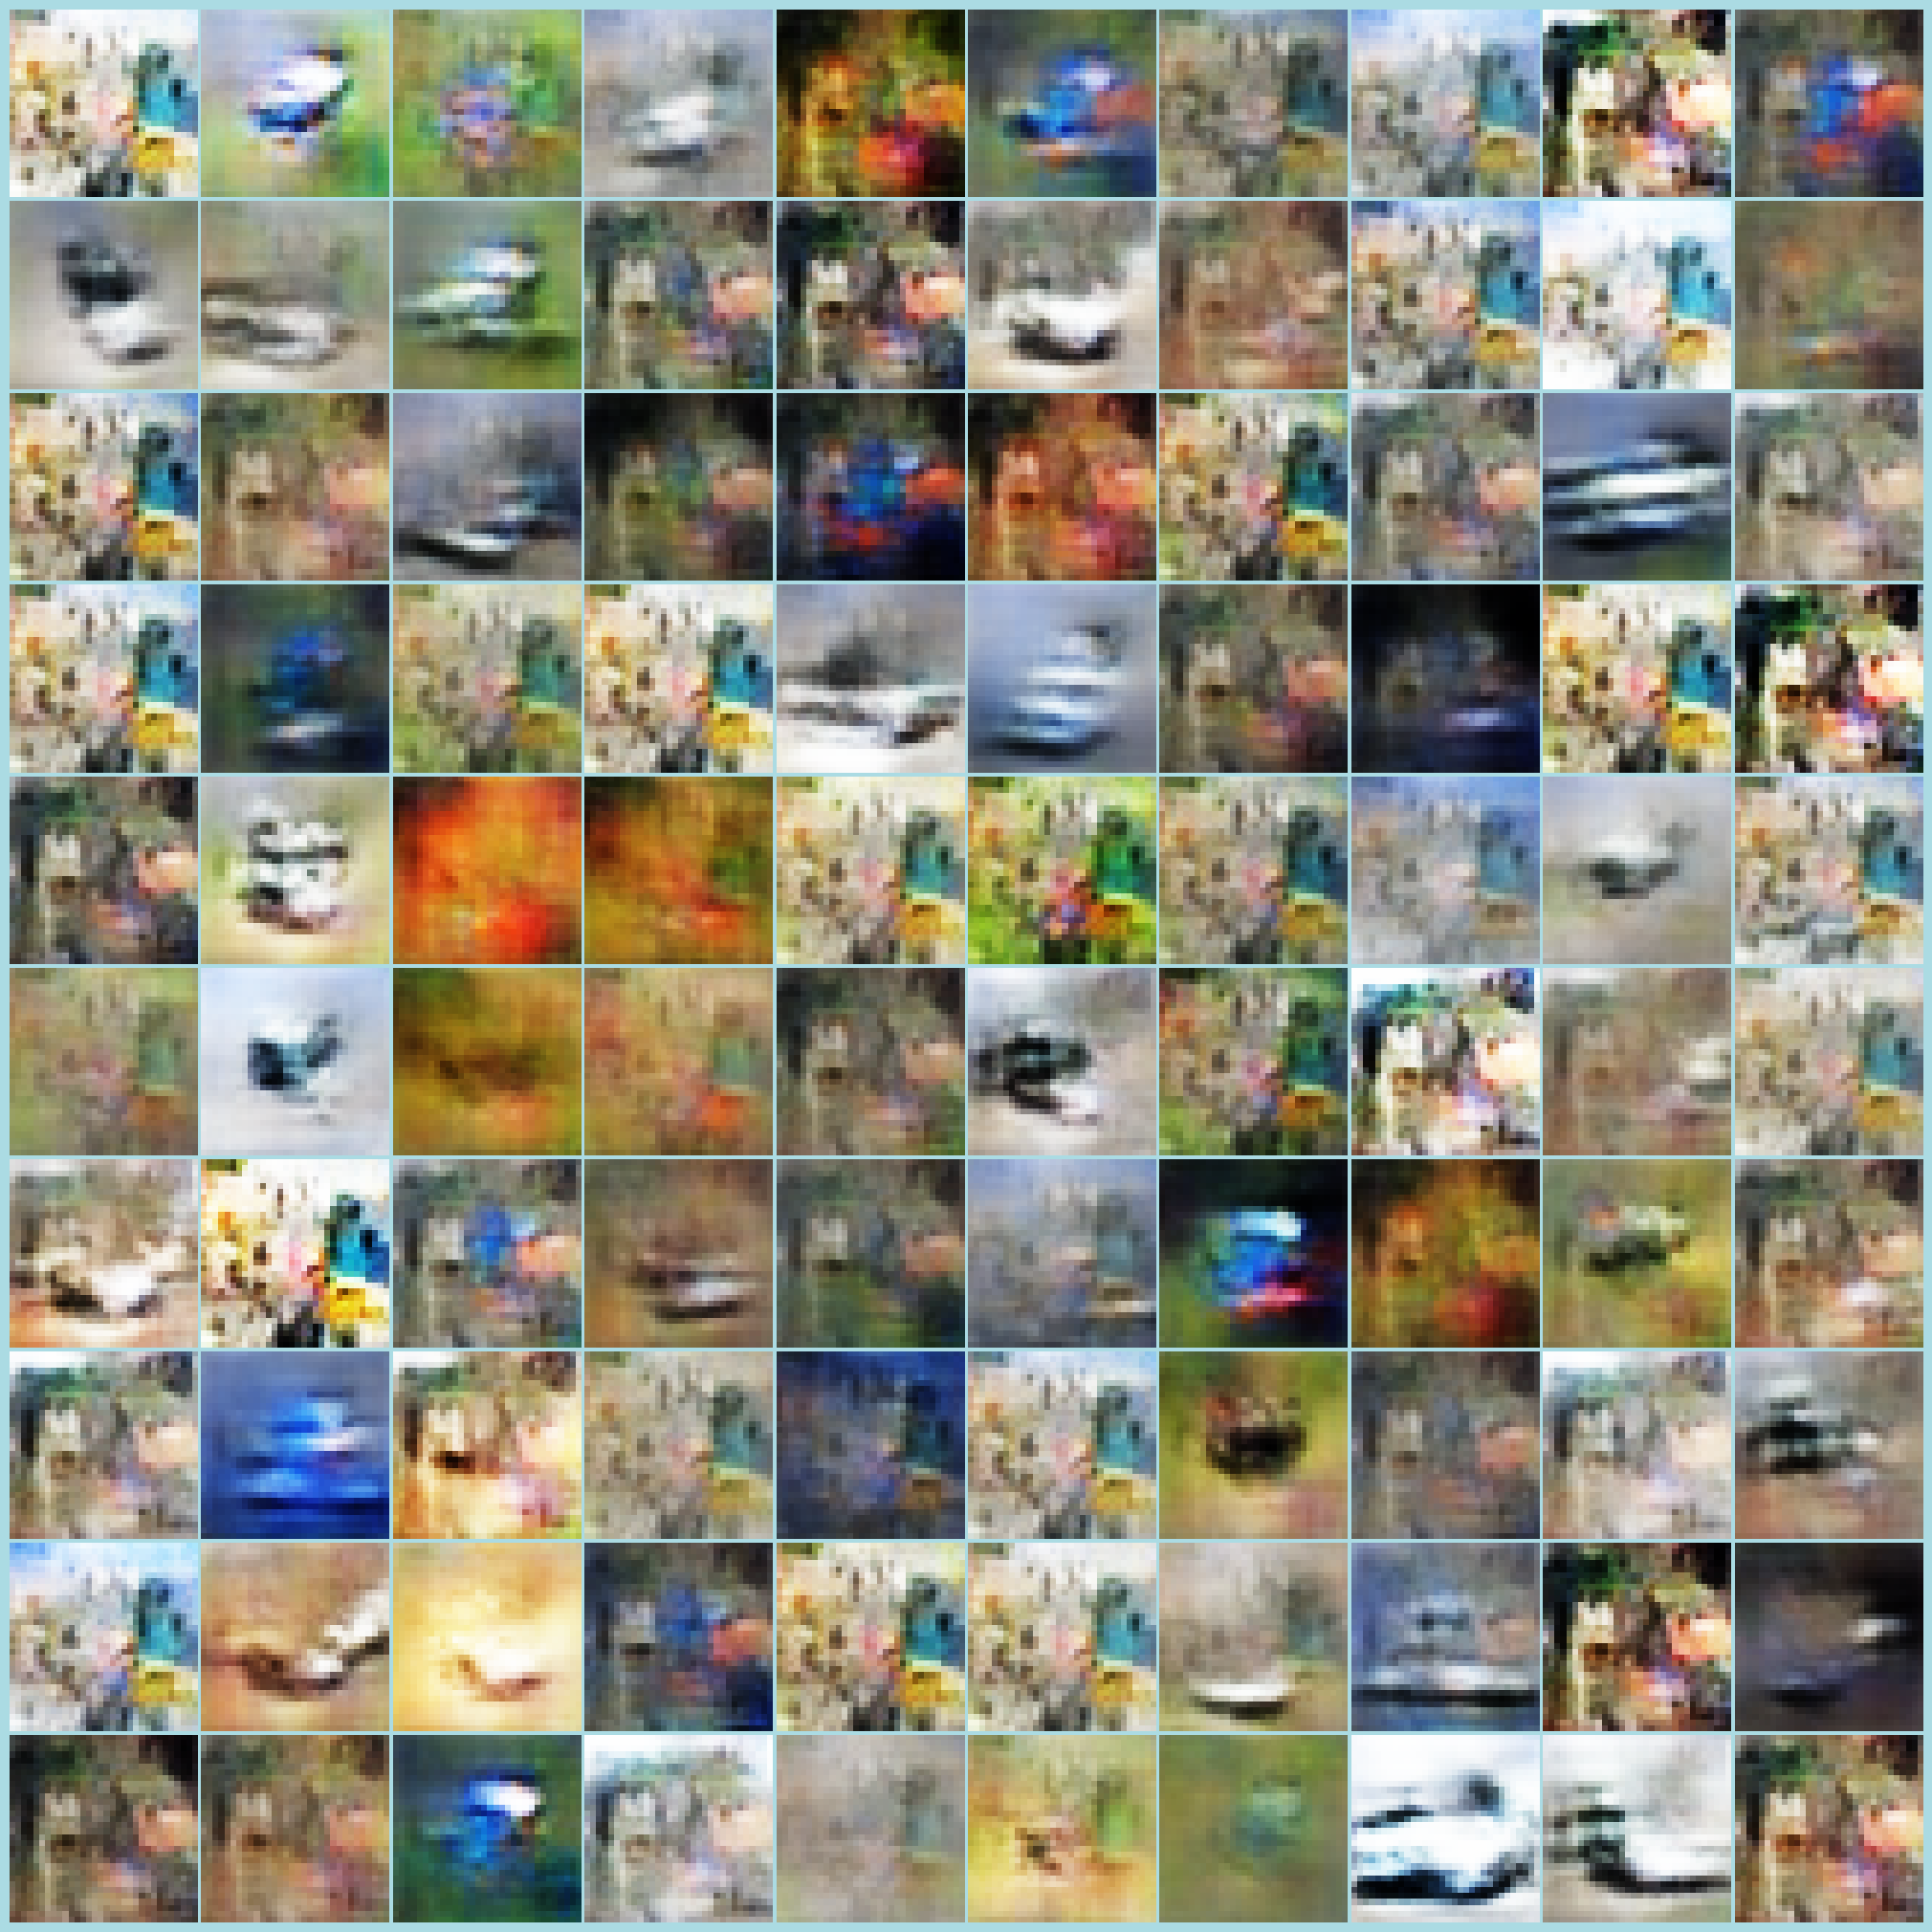

In [30]:
generate_1000(generator)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- 1000 images provided showing actually model collapse happened

</div>

#### Storing the scores

In [31]:
new_row = {'Model':'Baseline WGAN 1', 'FID':scores1[0], 'KID': scores1[1], 'd_loss':gan_history_1['d_loss'][-1], 'g_loss':gan_history_1['g_loss'][-1] }
new_df = pd.DataFrame([new_row])
full_scores = pd.concat([full_scores, new_df], ignore_index=True)
full_scores

Model         FID       KID    d_loss    g_loss
0  Baseline WGAN 1  129.074924  0.085398  0.515937 -0.469762

### Second Model

##### Generator

__Key Difference__
1. Change upsamling to conv transpose here

__Key Ideas__

1. **Input and Dense Layer**:
    - **Dense Layer**: 
        - **Units**: The layer has 128 * 8 * 8 units.
        - **Input**: Takes an input of dimension `latent_dim` representing the latent space.
        - **Kernel Initializer**: Utilizes `RandomNormal` with a standard deviation of `GAUSS_SD` for weight initialization.
2. **Reshape Layer**:
    - **New Shape**: Reshapes the output of the Dense layer into an 8x8x128 tensor

3. **Normalization and Activation**:
    - **BatchNormalization**: 
        - **Momentum**: Utilizes a momentum factor of `MOMENTUM`.
    - **LeakyReLU**:
        - **Alpha**: Set to `ALPHA`.

4. **Transposed Convolution Layers**:
    - **Conv2DTranspose (First Layer)**:
        - **Filters**: 128
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'

    - **Conv2DTranspose (Second Layer)**:
        - **Filters**: 3 (corresponding to RGB channels)
        - **Kernel Size**: 5x5
        - **Strides**: 2
        - **Padding**: 'same'
        - **Activation**: 'tanh'


In [32]:
ALPHA = 0.2
MOMENTUM = 0.8
GAUSS_SD = 0.02
def build_generator(latent_dim):
    model = Sequential(name='Generator')
    model.add(Dense(units=128 * 8 * 8, input_shape=(latent_dim,), kernel_initializer=RandomNormal(stddev=GAUSS_SD)))
    model.add(Reshape((8, 8, 128)))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2DTranspose(filters=128, kernel_size=(5, 5), strides=2, padding='same'))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2DTranspose(filters=3, kernel_size=(5, 5), strides=2, padding='same', activation='tanh'))
    return model

##### Discriminator

    
__Key Ideas__ (DCGAN4)

1. **Model Initialization**:
    - **Weights Initialization**: Uses `RandomNormal(mean=0, stddev=0.02)` for initializing the weights of the layers.
    - **Dropout Rate**:  0.3

2. **Input Layer**:
    - **Input Shape**: (32, 32, 3), accepts RGB images of size 32x32 pixels.

3. **Convolutional and Regularization Layers**:
    - **Conv2D with SpectralNormalization (Four Layers)**:
        - **Filters**: Increasing number of filters with each layer (64, 128, 256, 512)
        - **Kernel Size**: (4, 4) for all layers.
        - **Strides**: (2, 2) 
        - **Padding**: 'same' 
        - **Kernel Initializer**: `weights_init`
    - **LeakyReLU (after each Conv2D)**:
        - **Alpha**: 0.2
    - **Dropout (after each LeakyReLU)**:
        - **Rate**: `dropout_rate`, added after each LeakyReLU layer for regularization.

4. **Flattening and Output Layer**:
    - **Flatten**: Transforms the 3D feature maps into a 1D feature vector, preparing it for the dense output layer.
    - **Dense**:
        - **Units**: 1, the output layer for binary classification.
        - **Activation**: 'sigmoid'

In [33]:
def build_discriminator(in_shape = (32,32,3)):
    model = Sequential(name='Discriminator')
    model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(stddev=GAUSS_SD), 
                     input_shape=in_shape))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=2, padding='same'))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=2, padding='same'))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=2, padding='same'))
    model.add(BatchNormalization(momentum=MOMENTUM))
    model.add(LeakyReLU(ALPHA))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

#### Creating Checkpoint

In [34]:
callbacks = [ImageGenerationCallback(num_img=10, noise=128, display_freq=5, vmin=-1, vmax=1), ModelCheckpointCallback(model_dir='baselineWGAN-2')]

#### Training

In [35]:
discriminator_wgan2 = build_discriminator()
generator_wgan2 = build_generator(128)

In [36]:
tf.keras.backend.clear_session()
K.clear_session()

Epoch 1/100
782/782 [==============================] - ETA: 0s - d_real_loss: 0.9466 - d_fake_loss: 0.0249 - g_loss: -0.0258 - d_acc: 0.9821 - d_realO: 0.9466 - d_fakeO: 0.0248

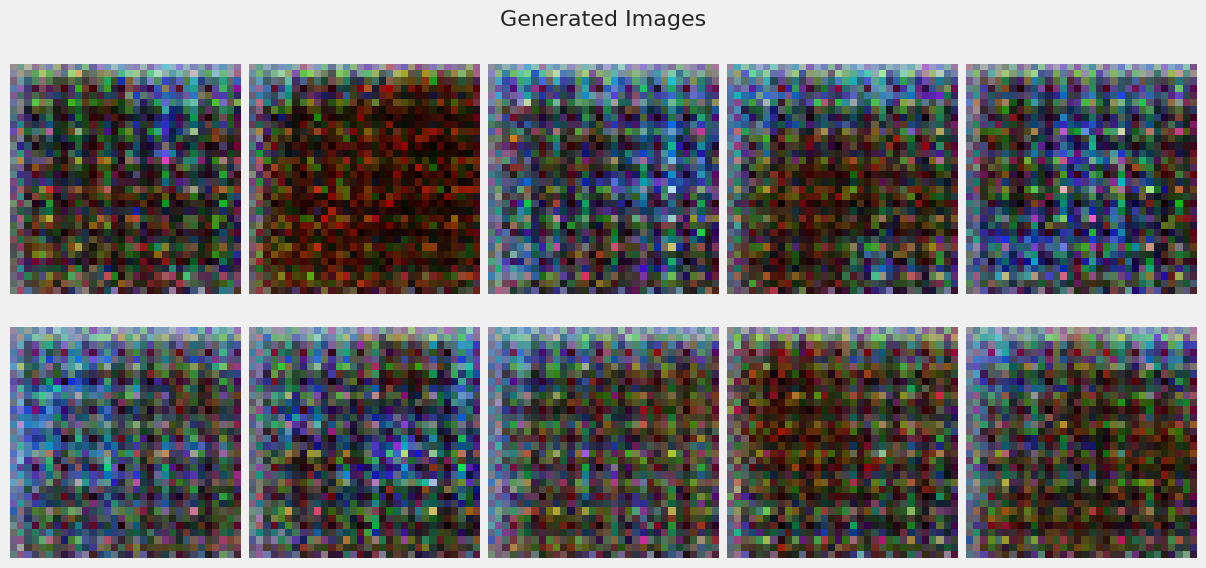

782/782 [==============================] - 23s 24ms/step - d_real_loss: 0.9466 - d_fake_loss: 0.0249 - g_loss: -0.0258 - d_acc: 0.9821 - d_realO: 0.9466 - d_fakeO: 0.0248
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8774 - d_fake_loss: 0.0534 - g_loss: -0.0533 - d_acc: 0.9318 - d_realO: 0.8777 - d_fakeO: 0.0533
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8366 - d_fake_loss: 0.1454 - g_loss: -0.1286 - d_acc: 0.8655 - d_realO: 0.8357 - d_fakeO: 0.1457
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.7622 - d_fake_loss: 0.3369 - g_loss: -0.3136 - d_acc: 0.7599 - d_realO: 0.7626 - d_fakeO: 0.3362
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8906 - d_fake_loss: 0.3721 - g_loss: -0.3555 - d_acc: 0.7823 - d_realO: 0.8908 - d_fakeO: 0.3717
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9396 - d_fa

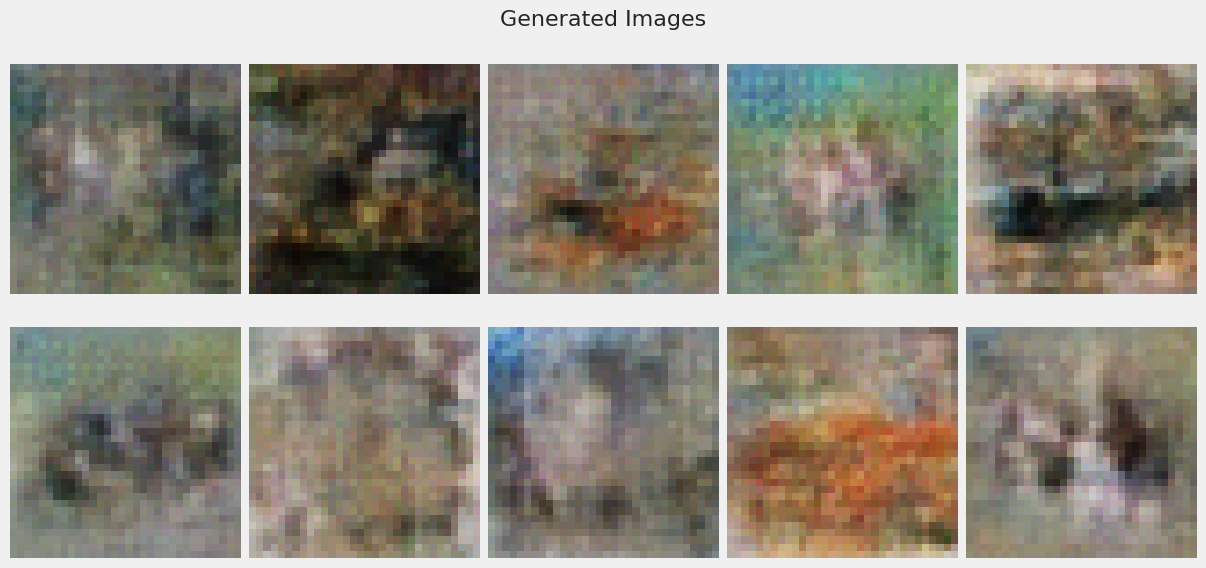

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.9956 - d_fake_loss: 0.1571 - g_loss: -0.1513 - d_acc: 0.9516 - d_realO: 0.9956 - d_fakeO: 0.1569
Epoch 12/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8625 - d_fake_loss: 0.3016 - g_loss: -0.2873 - d_acc: 0.8155 - d_realO: 0.8628 - d_fakeO: 0.3018
Epoch 13/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9983 - d_fake_loss: 0.1461 - g_loss: -0.1419 - d_acc: 0.9672 - d_realO: 0.9983 - d_fakeO: 0.1460
Epoch 14/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8243 - d_fake_loss: 0.2762 - g_loss: -0.2674 - d_acc: 0.8087 - d_realO: 0.8247 - d_fakeO: 0.2762
Epoch 15/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8172 - d_fake_loss: 0.2737 - g_loss: -0.2705 - d_acc: 0.8075 - d_realO: 0.8153 - d_fakeO: 0.2752
Epoch 16/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8502 -

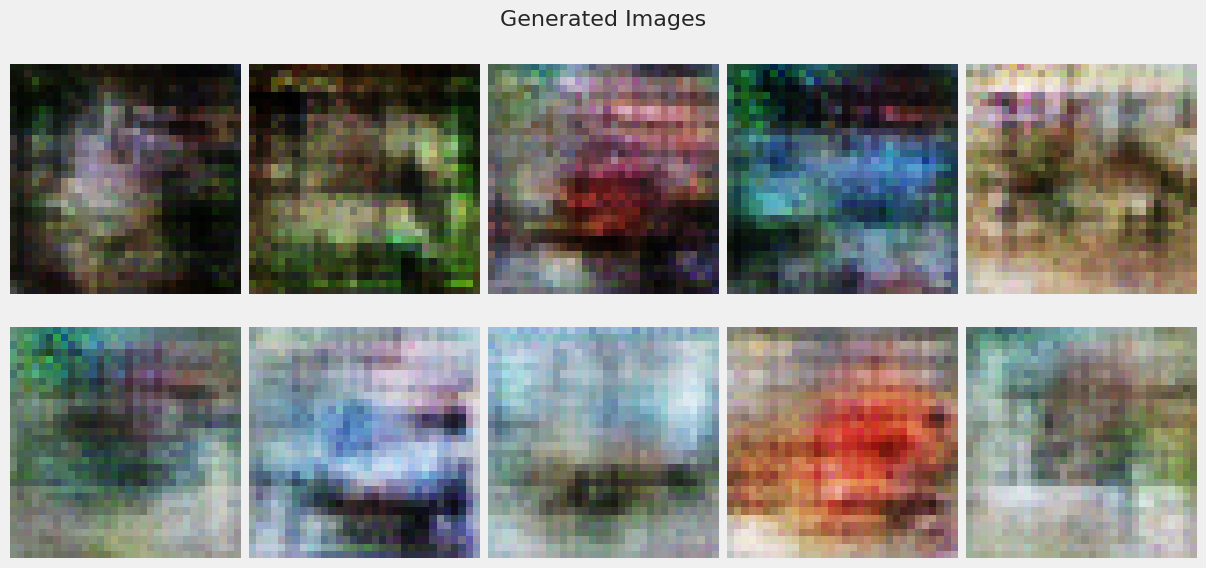

782/782 [==============================] - 18s 24ms/step - d_real_loss: 0.3286 - d_fake_loss: 0.2082 - g_loss: -0.2010 - d_acc: 0.5859 - d_realO: 0.3298 - d_fakeO: 0.2082
Epoch 22/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9692 - d_fake_loss: 0.1323 - g_loss: -0.1306 - d_acc: 0.9764 - d_realO: 0.9693 - d_fakeO: 0.1322
Epoch 23/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.7544 - d_fake_loss: 0.1547 - g_loss: -0.1537 - d_acc: 0.8387 - d_realO: 0.7530 - d_fakeO: 0.1548
Epoch 24/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.2823 - d_fake_loss: 0.2481 - g_loss: -0.2427 - d_acc: 0.5276 - d_realO: 0.2819 - d_fakeO: 0.2482
Epoch 25/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.6330 - d_fake_loss: 0.2711 - g_loss: -0.2613 - d_acc: 0.7169 - d_realO: 0.6318 - d_fakeO: 0.2708
Epoch 26/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.6609 -

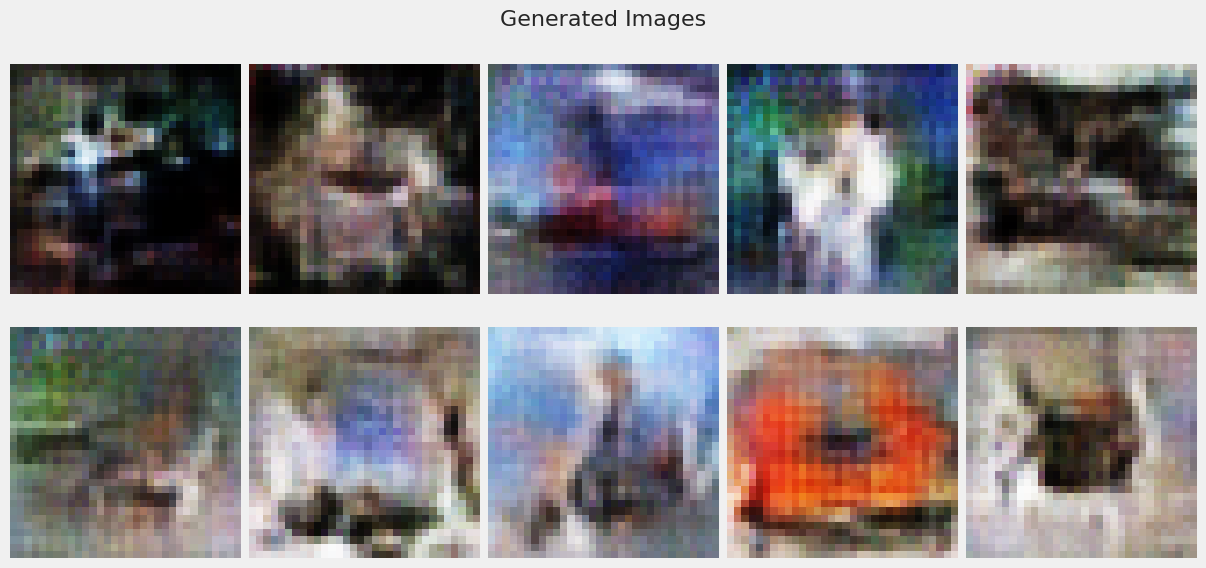

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.6497 - d_fake_loss: 0.3019 - g_loss: -0.2894 - d_acc: 0.6953 - d_realO: 0.6505 - d_fakeO: 0.3012
Epoch 32/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8398 - d_fake_loss: 0.1872 - g_loss: -0.1820 - d_acc: 0.8637 - d_realO: 0.8401 - d_fakeO: 0.1874
Epoch 33/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9995 - d_fake_loss: 0.1084 - g_loss: -0.1081 - d_acc: 0.9953 - d_realO: 0.9995 - d_fakeO: 0.1084
Epoch 34/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9996 - d_fake_loss: 0.0850 - g_loss: -0.0839 - d_acc: 0.9996 - d_realO: 0.9996 - d_fakeO: 0.0849
Epoch 35/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9495 - d_fake_loss: 0.1735 - g_loss: -0.1701 - d_acc: 0.9209 - d_realO: 0.9493 - d_fakeO: 0.1744
Epoch 36/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8908 -

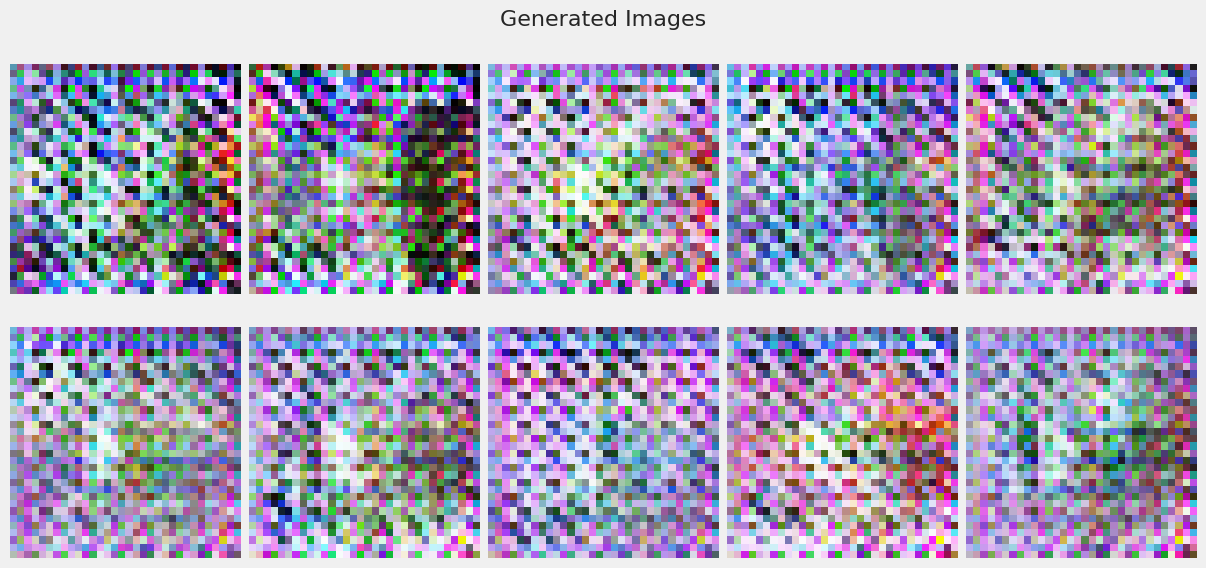

782/782 [==============================] - 18s 24ms/step - d_real_loss: 0.3988 - d_fake_loss: 0.5852 - g_loss: -0.5844 - d_acc: 0.3887 - d_realO: 0.3981 - d_fakeO: 0.5853
Epoch 42/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.1150 - d_fake_loss: 0.2928 - g_loss: -0.2904 - d_acc: 0.4147 - d_realO: 0.1150 - d_fakeO: 0.2927
Epoch 43/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.7868 - d_fake_loss: 0.1349 - g_loss: -0.1336 - d_acc: 0.8671 - d_realO: 0.7873 - d_fakeO: 0.1348
Epoch 44/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.3905 - d_fake_loss: 0.1540 - g_loss: -0.1523 - d_acc: 0.6485 - d_realO: 0.3901 - d_fakeO: 0.1541
Epoch 45/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8475 - d_fake_loss: 0.1500 - g_loss: -0.1473 - d_acc: 0.9041 - d_realO: 0.8478 - d_fakeO: 0.1498
Epoch 46/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9995 -

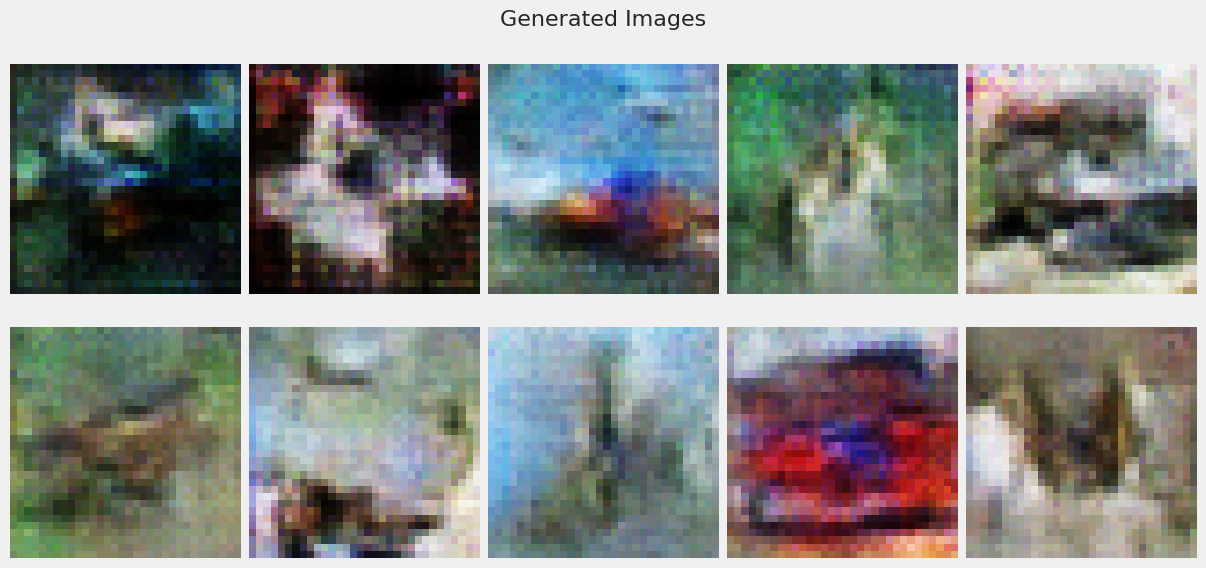

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.6522 - d_fake_loss: 0.5212 - g_loss: -0.5162 - d_acc: 0.6206 - d_realO: 0.6526 - d_fakeO: 0.5216
Epoch 52/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8297 - d_fake_loss: 0.2768 - g_loss: -0.2662 - d_acc: 0.8578 - d_realO: 0.8300 - d_fakeO: 0.2769
Epoch 53/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.8679 - d_fake_loss: 0.1398 - g_loss: -0.1320 - d_acc: 0.9137 - d_realO: 0.8682 - d_fakeO: 0.1406
Epoch 54/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9976 - d_fake_loss: 0.1421 - g_loss: -0.1404 - d_acc: 0.9828 - d_realO: 0.9976 - d_fakeO: 0.1420
Epoch 55/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9987 - d_fake_loss: 0.0900 - g_loss: -0.0890 - d_acc: 0.9999 - d_realO: 0.9987 - d_fakeO: 0.0901
Epoch 56/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9992 -

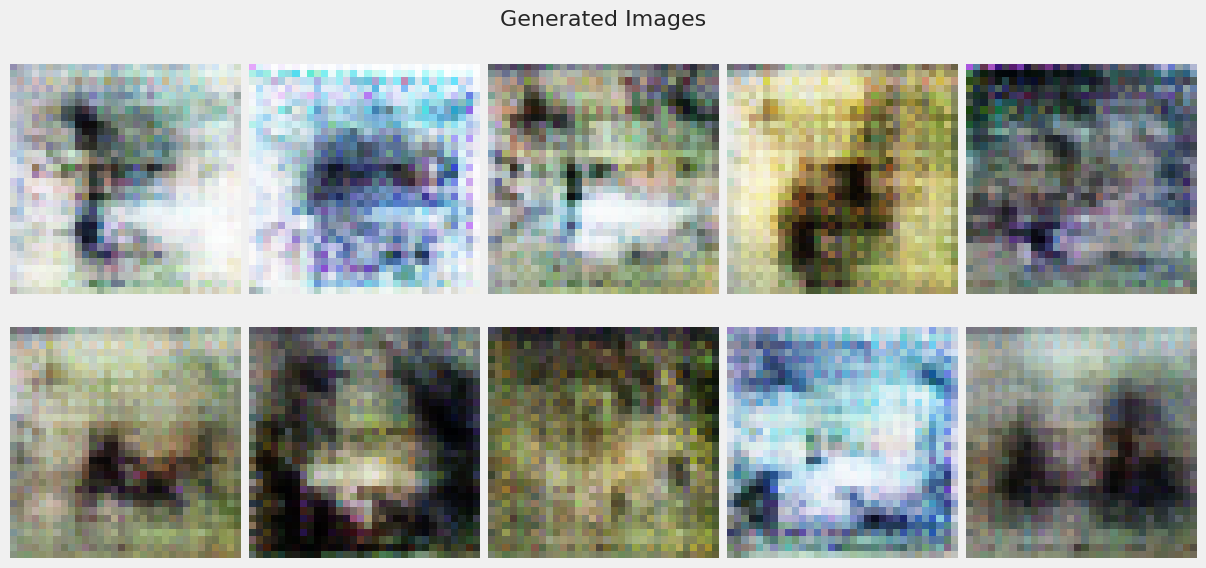

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.1339 - d_fake_loss: 0.1627 - g_loss: -0.1627 - d_acc: 0.5034 - d_realO: 0.1340 - d_fakeO: 0.1627
Epoch 62/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.5894 - d_fake_loss: 0.1440 - g_loss: -0.1403 - d_acc: 0.7741 - d_realO: 0.5900 - d_fakeO: 0.1437
Epoch 63/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9737 - d_fake_loss: 0.1356 - g_loss: -0.1324 - d_acc: 0.9672 - d_realO: 0.9737 - d_fakeO: 0.1355
Epoch 64/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9995 - d_fake_loss: 0.0585 - g_loss: -0.0579 - d_acc: 0.9999 - d_realO: 0.9995 - d_fakeO: 0.0586
Epoch 65/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.7102 - d_fake_loss: 0.1271 - g_loss: -0.1213 - d_acc: 0.8221 - d_realO: 0.7108 - d_fakeO: 0.1269
Epoch 66/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9993 -

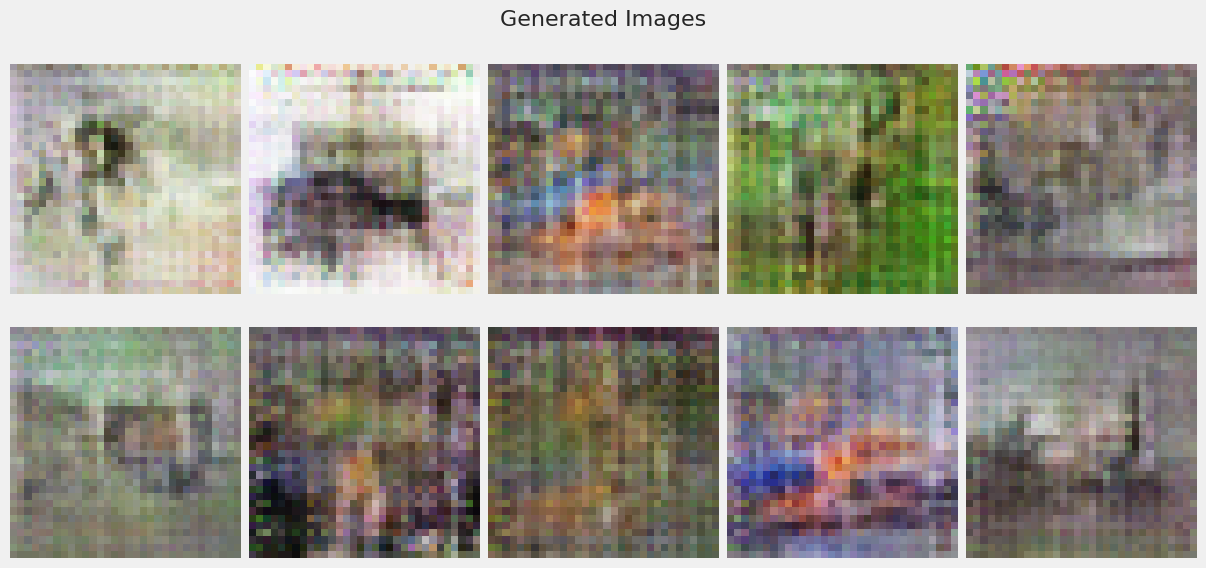

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.7918 - d_fake_loss: 0.1268 - g_loss: -0.1236 - d_acc: 0.8921 - d_realO: 0.7923 - d_fakeO: 0.1267
Epoch 72/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9993 - d_fake_loss: 0.0540 - g_loss: -0.0535 - d_acc: 1.0000 - d_realO: 0.9993 - d_fakeO: 0.0540
Epoch 73/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9997 - d_fake_loss: 0.0459 - g_loss: -0.0455 - d_acc: 1.0000 - d_realO: 0.9997 - d_fakeO: 0.0460
Epoch 74/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9997 - d_fake_loss: 0.0608 - g_loss: -0.0600 - d_acc: 1.0000 - d_realO: 0.9997 - d_fakeO: 0.0608
Epoch 75/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9996 - d_fake_loss: 0.0530 - g_loss: -0.0519 - d_acc: 1.0000 - d_realO: 0.9996 - d_fakeO: 0.0530
Epoch 76/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.2384 -

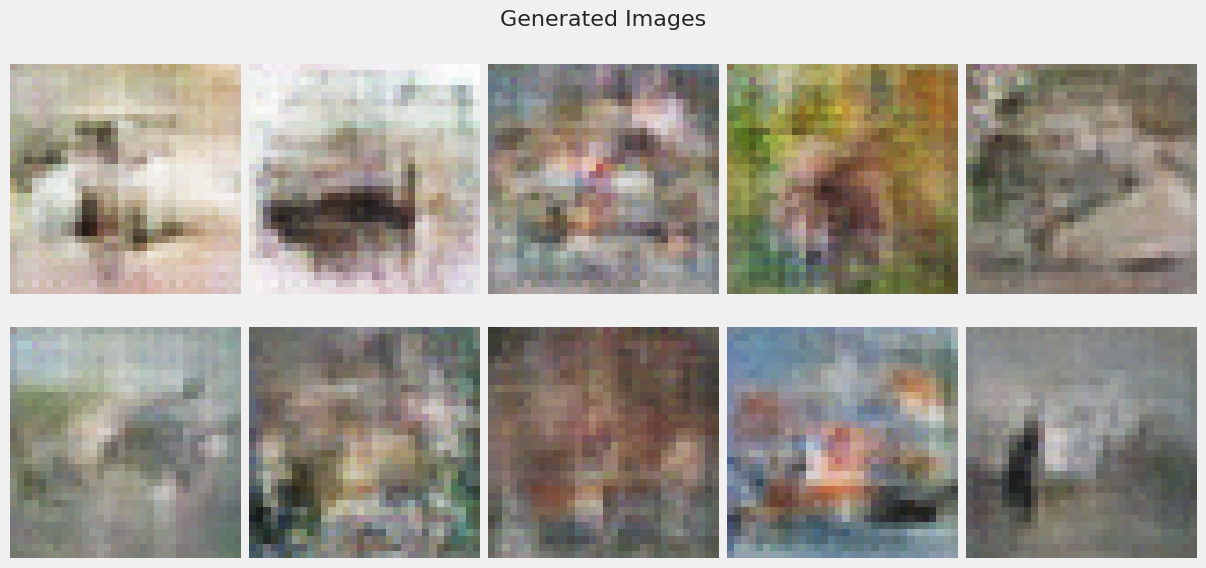

782/782 [==============================] - 18s 24ms/step - d_real_loss: 0.9987 - d_fake_loss: 0.0512 - g_loss: -0.0506 - d_acc: 0.9997 - d_realO: 0.9965 - d_fakeO: 0.0511
Epoch 82/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.0583 - d_fake_loss: 0.9057 - g_loss: -0.9055 - d_acc: 0.0565 - d_realO: 0.0585 - d_fakeO: 0.9059
Epoch 83/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.6695 - d_fake_loss: 0.9980 - g_loss: -0.9979 - d_acc: 0.3328 - d_realO: 0.6701 - d_fakeO: 0.9980
Epoch 84/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9906 - d_fake_loss: 0.9604 - g_loss: -0.9584 - d_acc: 0.5131 - d_realO: 0.9906 - d_fakeO: 0.9589
Epoch 85/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9849 - d_fake_loss: 0.2330 - g_loss: -0.2321 - d_acc: 0.9498 - d_realO: 0.9849 - d_fakeO: 0.2327
Epoch 86/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.1948 -

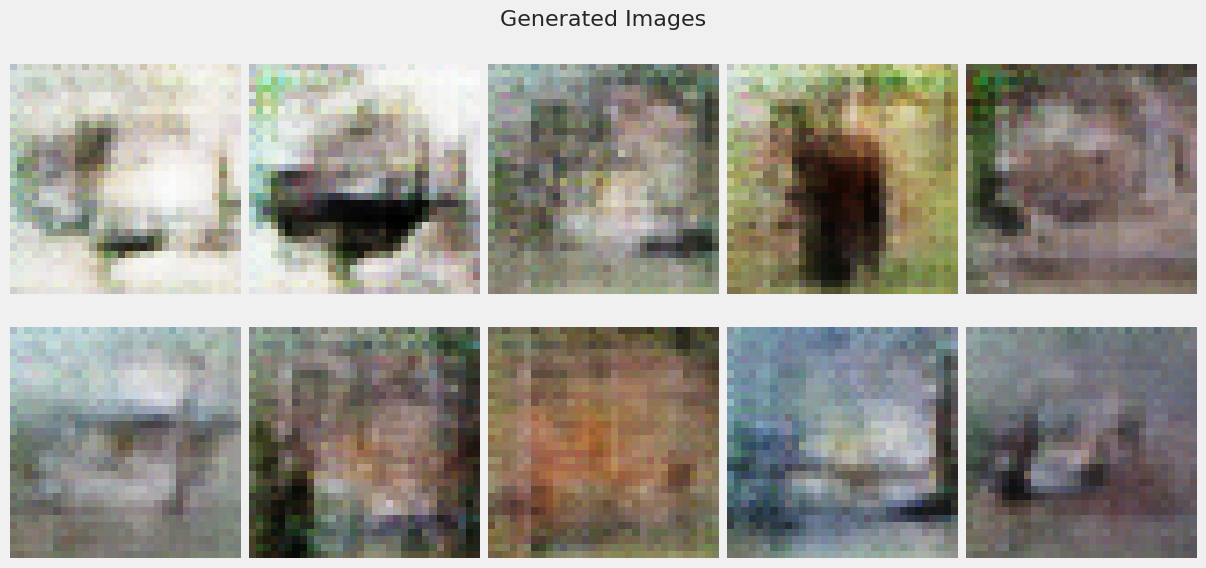

782/782 [==============================] - 19s 24ms/step - d_real_loss: 0.9995 - d_fake_loss: 0.0400 - g_loss: -0.0394 - d_acc: 1.0000 - d_realO: 0.9995 - d_fakeO: 0.0399
Epoch 92/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.5525 - d_fake_loss: 0.1998 - g_loss: -0.1962 - d_acc: 0.6823 - d_realO: 0.5518 - d_fakeO: 0.1999
Epoch 93/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.4411 - d_fake_loss: 0.3522 - g_loss: -0.3502 - d_acc: 0.5559 - d_realO: 0.4414 - d_fakeO: 0.3531
Epoch 94/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9174 - d_fake_loss: 0.1706 - g_loss: -0.1654 - d_acc: 0.9095 - d_realO: 0.9176 - d_fakeO: 0.1705
Epoch 95/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9994 - d_fake_loss: 0.0532 - g_loss: -0.0523 - d_acc: 1.0000 - d_realO: 0.9994 - d_fakeO: 0.0532
Epoch 96/100
782/782 [==============================] - 18s 23ms/step - d_real_loss: 0.9992 -

In [37]:
gan_2= train_gan(discriminator_wgan2, generator_wgan2, noise, 'Baseline WGAN 2', dataset, 100, callbacks=callbacks)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Looking at the accuracy, we can see that the discriminator ended with a  100% accuracy while it may not be the best, it did show that it is not able to fully determine real and fake as it started from 0.6
- Model Collapse


</div>

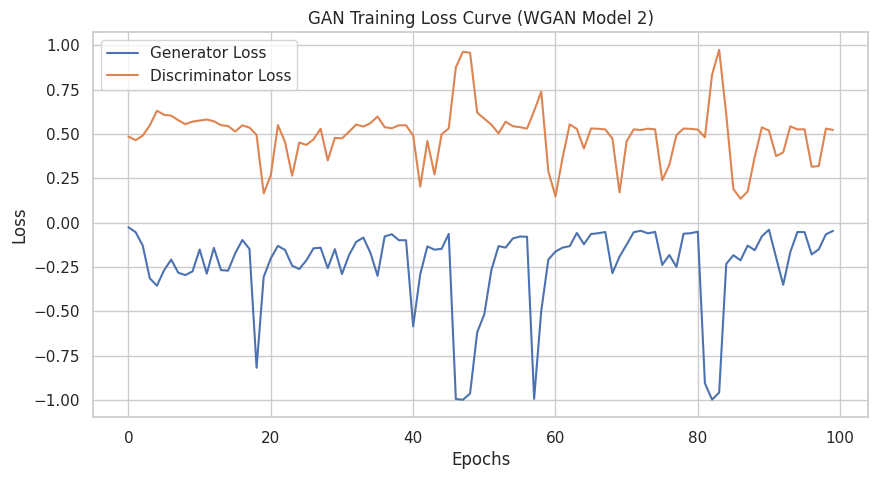

In [38]:
gan_history = gan_2[0].history
generator = gan_2[1].generator  
gan_history['d_loss'] = [(real_loss + fake_loss) / 2 for real_loss, fake_loss in zip(gan_history['d_real_loss'], gan_history['d_fake_loss'])]
evaluator = Evaluation(generator, latent_dim, 512, 10000, 1024)
evaluator.plot_loss_curve(gan_history, title='GAN Training Loss Curve (WGAN Model 2)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- Discriminator loss
    - For the discriminator loss, it fluctuates
- Generator loss
    - For the generator loss, it fluctuates

</div>

In [39]:
tf.keras.backend.clear_session()
K.clear_session()
scores1 = evaluator.compute_metrics(x_train)
print('FID Score:', scores1[0])
print('KID Score:', scores1[1])

None
313/313 [==============================] - 0s 960us/step
FID Score: 182.95591499046787
KID Score: 0.19004712310590843


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>

- FID Score of 182
- KID Score is 0.19
    
It is not too good, worse than DCGAN

</div>

In [ ]:
generate_1000(generator)

#### Storing the scores

In [40]:
new_row = {'Model':'Baseline WGAN 2', 'FID':scores1[0], 'KID': scores1[1], 'd_loss':gan_history['d_loss'][-1], 'g_loss':gan_history['g_loss'][-1] }
new_df = pd.DataFrame([new_row])
full_scores = pd.concat([full_scores, new_df], ignore_index=True)
full_scores

Model         FID       KID    d_loss    g_loss
0  Baseline WGAN 1  129.074924  0.085398  0.515937 -0.469762
1  Baseline WGAN 2  182.955915  0.190047  0.523048 -0.046282

### __WGAN DID NOT IMPROVE HERE__


### Store All Results

In [42]:
full_scores.to_csv('full_scores3.csv')